# Exploratory Data Analysis (EDA) (Este tarea 6.1 a partir del apartado 18. Preprocesamiento)

## 1. Importación de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install sweetviz
import sweetviz as sv

 ## 2. Carga del dataset

In [2]:
df_bank = pd.read_csv('bank_dataset.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 3. Mostrar las primeres filas del dataset


In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 4. Información general del dataset

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


## 5. Descripción estadística del dataset

In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


La variable que tiene más anómalos es el balance pues su media está muy alejada de su mediana, seguida de duration.  Por ejemplo, el saldo anual de la cuenta es de 81204 $. También vemos un comportamiento extraño de la variable previous, pues la mediana está en zero, cuando su media es 0,83. Tendremos que verlo posteriormente con las visualizaciones.  

## 6. Histograma de cada variable numèrica

In [6]:
import matplotlib
print(matplotlib.__version__)

3.9.2


In [7]:
plt.style.use("tableau-colorblind10")
plt.style.use("seaborn-v0_8-white")
plt.style.use("seaborn-v0_8-muted")

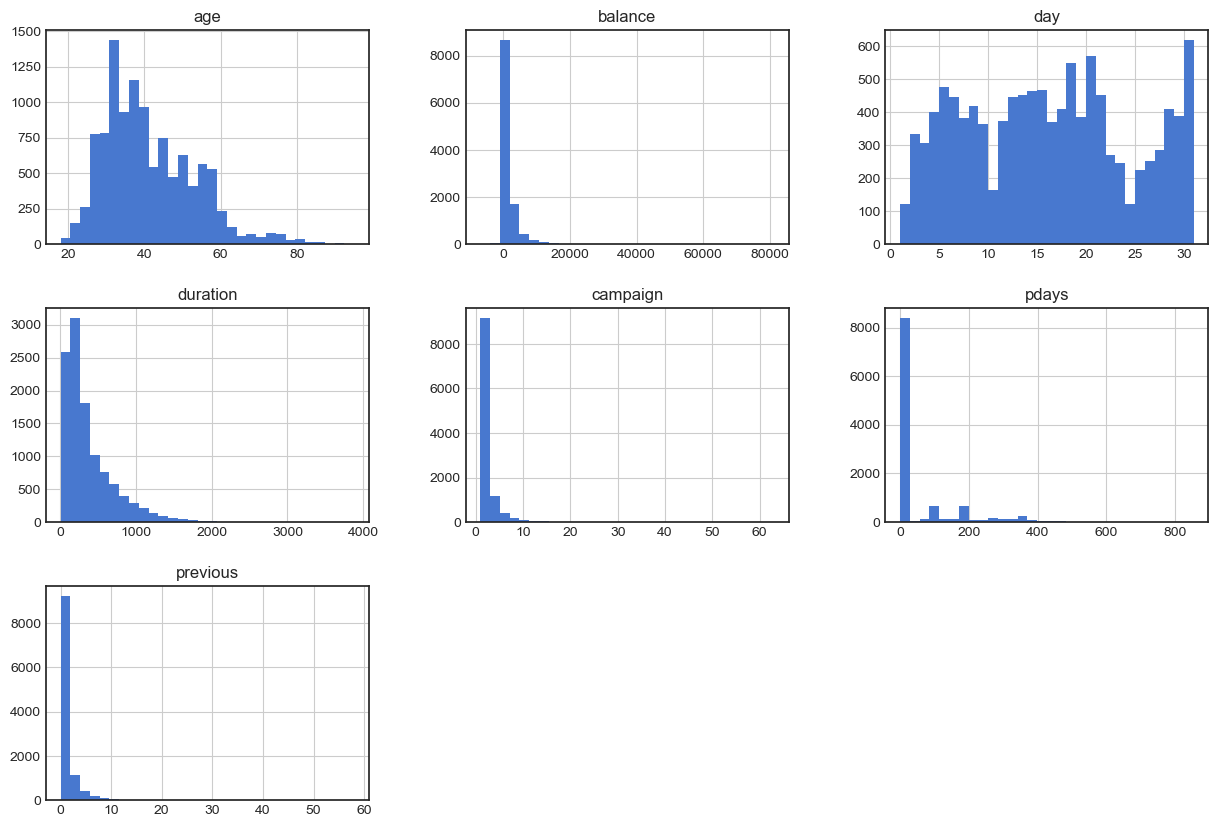

In [8]:
plt.style.use("seaborn-v0_8-white")
df_bank.hist(bins=30, figsize=(15, 10))
plt.show()

Se confirma de los histogramas de las variablas numéricas, que el balance debe tener outliers extremos, al extenderse la escala x hasta 80000 $. También la variable pdays tiene
un pico muy considerable entorno a x=0, así como la variable campaign y previous. 

# 7. Contar los valores de cada variable categórica

In [9]:
for column in df_bank.select_dtypes(include=['object']).columns:
    counts = df_bank[column].value_counts()
    percent = df_bank[column].value_counts(normalize=True) * 100
    df_column = pd.DataFrame({'Conteo': counts, 'Porcentaje (%)':  percent})
    print(df_column,end="\n\n---------------\n\n")
    


               Conteo  Porcentaje (%)
job                                  
management       2566       22.988712
blue-collar      1944       17.416234
technician       1823       16.332199
admin.           1334       11.951263
services          923        8.269127
retired           778        6.970077
self-employed     405        3.628382
student           360        3.225228
unemployed        357        3.198352
entrepreneur      328        2.938541
housemaid         274        2.454757
unknown            70        0.627128

---------------

          Conteo  Porcentaje (%)
marital                         
married     6349       56.905978
single      3517       31.522811
divorced    1291       11.571211

---------------

           Conteo  Porcentaje (%)
education                        
secondary    5474       49.072165
tertiary     3685       33.034514
primary      1500       13.446885
unknown       496        4.446437

---------------

         Conteo  Porcentaje (%)
default      

La variable objetivo depósito, está bien balanceados sus resultados pues, 'yes' y 'no' estan en las mismas proporciones. 

In [10]:
is_previous_0=df_bank["previous"]==0

df_bank[is_previous_0]["contact"].value_counts()


contact
cellular     5433
unknown      2327
telephone     564
Name: count, dtype: int64

Vemos que la mayoría de unknown 2346 se corresponden cuando previous=0 y pdays=-1. Ya que para todo el dataset teníamos 2346 y filtrando por previous=0, tenemos 2327. Veremos posteriormente que previos=0, está muy desbalanceado frente a los otros valores de previous (llamadas en campaña anterior). Y por lo tanto, haremos una técnica de submuestreo de previos=0. Lo haremos en pasos más adelantes, cuando analicemos previous al detalle. 

# 8. Visualitzación de valores nulos en mapa de calor

In [11]:
print(df_bank['education'].value_counts())
print(df_bank['job'].value_counts())

education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


Consideraremos que cuando education='unknown' a efectos prácticos es como un null, para tratarlo igual para hacer técnicas de imputación posteriormente. Lo mismo para education.

In [12]:
#
is_null=(df_bank[["age","marital","education"]].isnull())
is_null

,age,marital,education
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
11157,False,False,False
11158,False,False,False
11159,False,False,False
11160,False,False,False


In [13]:
is_null_age=is_null["age"].value_counts().reset_index()
is_null_age=is_null_age.rename(columns={"age":"is_null","count":"num_age"})
is_null_marital=is_null["marital"].value_counts().reset_index()
is_null_marital=is_null_marital.rename(columns={"marital":"is_null","count":"num_marital"})
is_null_education=is_null["education"].value_counts().reset_index()
is_null_education=is_null_education.rename(columns={"education":"is_null","count":"num_education"})
is_null_education

,is_null,num_education
0,False,11155
1,True,7


In [14]:
is_null_age_marital=is_null_age.merge(is_null_marital,how="inner",on="is_null")
is_null_age_marital_education=is_null_age_marital.merge(is_null_education,how="inner",on="is_null")
is_null_age_marital_education


,is_null,num_age,num_marital,num_education
0,False,11152,11157,11155
1,True,10,5,7


In [15]:
df_pivot_is_null = is_null_age_marital_education.pivot(index="is_null", columns=["num_age","num_marital","num_education"], values=["num_age","num_marital","num_education"])


In [16]:
df_is_null_value_counts=is_null.value_counts().reset_index()
df_is_null_value_counts

,age,marital,education,count
0,False,False,False,11140
1,True,False,False,10
2,False,False,True,7
3,False,True,False,5


In [17]:
# Derretimos el DataFrame para transformar las columnas en filas
df_melted = df_is_null_value_counts.melt(id_vars='count', value_vars=['age', 'marital', 'education'],
                    var_name='variable', value_name='is_null')
df_melted 

,count,variable,is_null
0,11140,age,False
1,10,age,True
2,7,age,False
3,5,age,False
4,11140,marital,False
5,10,marital,False
6,7,marital,False
7,5,marital,True
8,11140,education,False
9,10,education,False


In [18]:
df_melted_groupby=df_melted.groupby(["variable","is_null"])["count"].sum().reset_index()
df_melted_groupby

,variable,is_null,count
0,age,False,11152
1,age,True,10
2,education,False,11155
3,education,True,7
4,marital,False,11157
5,marital,True,5


In [19]:
df_is_null_pivot=df_melted_groupby.pivot(index="is_null",columns="variable", values="count")
df_is_null_pivot


variable,age,education,marital
is_null,,,
False,11152,11155,11157
True,10,7,5


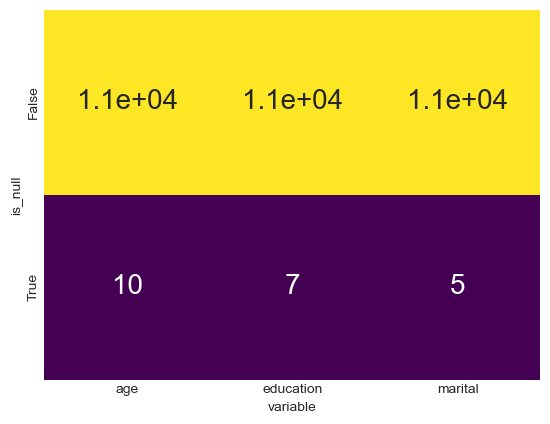

In [20]:
sns.heatmap(df_is_null_pivot, cbar=False, cmap='viridis',annot=True,annot_kws={"size": 20})
plt.show()

Este proceso de realizar el heatmap, ha sido laborioso y seguramente no hacía falta. Pero lo hemos intentado ya que por el camino hemos aprendido ha utilizar más métodos de pandas.

## 9. Contar los valores nulos por columna

In [21]:
df_bank.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

## 10. EDA automático con Sweetviz

In [22]:
#report = sv.analyze(df_bank)
#report.show_html('EDA_report.html')

## 11. Estrategia de rellenado de valores nulos

Lo primero que hago es tener un filtro donde pueda tener registros sin ningún nulo en **age, marital ni education**. El motivo, es 
para tener una tabla sin nulos, y así poder ver valores más probables de una etiqueta en función de otras dos, etc.

In [23]:
is_unknown_education=df_bank['education']=='unknown' 
is_unknown_job=df_bank['job']=='unknown' 
is_unknown_job

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: job, Length: 11162, dtype: bool

In [24]:
#is_bank_null=df_bank.isnull()
#df_bank[~is_bank_null]        #Queríamos escoger las filas que no había nulos, pero no era una buena estrategia.


#Así que escojo un filtro para saber que filas seguro no tienen nigún nulo en age, marital y education~
#Recordemos que isnull es un df construido como is_null=df_bank[["age","marital","education"]].isnull(),
#donde tenemos tres columnas de age, marital, education y en True para los valores que son nulos.
is_unknown_education=df_bank['education']=='unknown' 
is_unknown_job=df_bank['job']=='unknown' 

not_null_age_marital_education=(is_null['age'] | is_null['marital'] | is_null['education'] | is_unknown_education | is_unknown_job)==False



**Preprocesamiento para eliminación de nulls en age**

In [25]:
df_bank[df_bank["age"].isnull()]

#Vemos que de los 10 registros null de age, tenemos valores de job, marital y education. Pues así, por cada job, marital y education, miraremos cuál es la edad promedio y es la que asignaremos para rellenar**.
df_bank['clave_comparacion_age']=df_bank["job"].astype(str)+df_bank["education"].astype(str)+df_bank["marital"].astype(str)
#Creo una clave comparacion age, que seran los campos que tendré que comparar con la tabla que encuentre la edad promedio por job education y marital
df_bank["index_temp"]=df_bank.index

# Configura pandas para mostrar todas las filas
pd.set_option('display.max_rows', 20)

df_bank_groupby_job_edu_mar_age=df_bank[not_null_age_marital_education].groupby(["job","education","marital"])["age"].mean().round(0).astype(int)
df_bank_groupby_job_edu_mar_age=df_bank_groupby_job_edu_mar_age.reset_index()

df_bank_groupby_job_edu_mar_age["clave_comparacion_age"]=df_bank_groupby_job_edu_mar_age["job"].astype(str)+df_bank_groupby_job_edu_mar_age["education"].astype(str)+df_bank_groupby_job_edu_mar_age["marital"].astype(str)

rows_age_is_null=df_bank["age"].isnull()
aux_df_bank_age_recod=df_bank[rows_age_is_null][["index_temp","age","clave_comparacion_age"]].merge(df_bank_groupby_job_edu_mar_age[["age","clave_comparacion_age"]],how="inner",on="clave_comparacion_age")

df_bank=df_bank.merge(aux_df_bank_age_recod[["age_y","index_temp"]],how="left", on="index_temp")


In [26]:
df_bank_groupby_job_edu_mar_age['age'].value_counts()

age
43    9
45    9
42    7
40    5
33    5
     ..
50    1
49    1
58    1
56    1
28    1
Name: count, Length: 36, dtype: int64

Ahora tendré que realizar un apply, para combinar age y age_y para obtener new_age con todas las edades sin ningún null.

In [27]:
def fill_new_age(row):
    age=row["age"]
    age_y=row["age_y"]
    if pd.isnull(age):
        return (age_y)
    else:
        return (age)

df_bank["new_age"]=df_bank.apply(fill_new_age,axis=1)

#Verificamos que la nueva edad, no tiene ningún valor null
edades_iguales=(df_bank["age"]-df_bank["new_age"])==0
edades_iguales.value_counts()

df_bank=df_bank.drop(['age','age_y','clave_comparacion_age'],axis=1)
df_bank=df_bank.rename(columns={"new_age":"age"})

#Eliminamos las columnas que no utilizaremos y new_age la renombramos de nuevo a age y finalizamos el procesamiento de eliminacion de nulls de age
df_bank["age"]=df_bank["age"].astype(int)


**Proprocesamiento para eliminación de nulls en marital**

In [28]:
df_bank['marital'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: marital
Non-Null Count  Dtype 
--------------  ----- 
11157 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [29]:
df_bank[df_bank['marital'].isnull()]

df_bank['clave_comparacion_marital']=df_bank["job"].astype(str)+df_bank["education"].astype(str)

#pd.set_option('display.max_rows', 20)
df_bank_groupby_job_edu_mar=df_bank[not_null_age_marital_education].groupby(["job","education"])["marital"].agg(lambda x: x.mode()[0])
df_bank_groupby_job_edu_mar=df_bank_groupby_job_edu_mar.reset_index()
#Recordar que ponemos astype(str) para transformar toda la serie, por ejemplo la columna job a str. Si hacemos str(cadena), solo sirve para un valor no para 
#una serie
df_bank_groupby_job_edu_mar["clave_comparacion_marital"]=df_bank_groupby_job_edu_mar["job"].astype(str)+df_bank_groupby_job_edu_mar["education"].astype(str)


rows_marital_is_null=df_bank["marital"].isnull()

aux_df_bank_marital_recod=df_bank[rows_marital_is_null][["index_temp","marital","clave_comparacion_marital"]].merge(df_bank_groupby_job_edu_mar[["marital","clave_comparacion_marital"]],how="inner",on="clave_comparacion_marital")
df_bank=df_bank.merge(aux_df_bank_marital_recod[["marital_y","index_temp"]],how="left", on="index_temp")

In [30]:
def fill_new_marital(row):
    marital=row["marital"]
    marital_y=row["marital_y"]
    if pd.isnull(marital):
        return (marital_y)
    else:
        return (marital)

df_bank["new_marital"]=df_bank.apply(fill_new_marital,axis=1)

marital_iguales=(df_bank["marital"]==df_bank["new_marital"])
df_bank=df_bank.drop(['marital','marital_y','clave_comparacion_marital'],axis=1)
df_bank=df_bank.rename(columns={"new_marital":"marital"})


In [31]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         11162 non-null  object
 1   education   11155 non-null  object
 2   default     11162 non-null  object
 3   balance     11162 non-null  int64 
 4   housing     11162 non-null  object
 5   loan        11162 non-null  object
 6   contact     11162 non-null  object
 7   day         11162 non-null  int64 
 8   month       11162 non-null  object
 9   duration    11162 non-null  int64 
 10  campaign    11162 non-null  int64 
 11  pdays       11162 non-null  int64 
 12  previous    11162 non-null  int64 
 13  poutcome    11162 non-null  object
 14  deposit     11162 non-null  object
 15  index_temp  11162 non-null  int64 
 16  age         11162 non-null  int32 
 17  marital     11162 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 1.5+ MB


**Preprocesamiento de eliminación de null en education**

In [32]:
df_bank['education'].value_counts()
not_null_age_marital_education.value_counts()

True     10613
False      549
Name: count, dtype: int64

In [33]:
df_bank['clave_comparacion_education']=df_bank["job"].astype(str)+df_bank["marital"].astype(str)

df_bank_groupby_job_mar=df_bank[not_null_age_marital_education].groupby(["job","marital"])["education"].agg(lambda x: x.mode()[0])
df_bank_groupby_job_mar=df_bank_groupby_job_mar.reset_index()
df_bank_groupby_job_mar["clave_comparacion_education"]=df_bank_groupby_job_mar["job"].astype(str)+df_bank_groupby_job_mar["marital"].astype(str)

#rows_education_is_null=((df_bank["education"].isnull()) | (df_bank["education"]=='unknown'))
rows_education_is_null=df_bank["education"].isnull()
aux_df_bank_education_recod=df_bank[rows_education_is_null][["index_temp","education","clave_comparacion_education"]].merge(df_bank_groupby_job_mar[["education","clave_comparacion_education"]],how="inner",on="clave_comparacion_education")
df_bank=df_bank.merge(aux_df_bank_education_recod[["education_y","index_temp"]],how="left", on="index_temp")

In [34]:
rows_education_is_null.value_counts()

education
False    11155
True         7
Name: count, dtype: int64

In [35]:
def fill_new_education(row):
    education=row["education"]
    education_y=row["education_y"]
    if  pd.isnull(education):
        return (education_y)
    else:
        return (education)

df_bank["new_education"]=df_bank.apply(fill_new_education,axis=1)
df_bank=df_bank.drop(['education','education_y','clave_comparacion_education'],axis=1)
df_bank=df_bank.rename(columns={"new_education":"education"})


In [36]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         11162 non-null  object
 1   default     11162 non-null  object
 2   balance     11162 non-null  int64 
 3   housing     11162 non-null  object
 4   loan        11162 non-null  object
 5   contact     11162 non-null  object
 6   day         11162 non-null  int64 
 7   month       11162 non-null  object
 8   duration    11162 non-null  int64 
 9   campaign    11162 non-null  int64 
 10  pdays       11162 non-null  int64 
 11  previous    11162 non-null  int64 
 12  poutcome    11162 non-null  object
 13  deposit     11162 non-null  object
 14  index_temp  11162 non-null  int64 
 15  age         11162 non-null  int32 
 16  marital     11162 non-null  object
 17  education   11162 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 1.5+ MB


Ara anem a recodificar els unknown

In [37]:
#rows_education_is_null=((df_bank["education"].isnull()) | (df_bank["education"]=='unknown'))

df_bank['clave_comparacion_education']=df_bank["job"].astype(str)+df_bank["marital"].astype(str)
rows_education_is_unknown=df_bank['education']=="unknown"
aux_df_bank_education_recod=df_bank[rows_education_is_unknown][["index_temp","education","clave_comparacion_education"]].merge(df_bank_groupby_job_mar[["education","clave_comparacion_education"]],how="inner",on="clave_comparacion_education")
df_bank=df_bank.merge(aux_df_bank_education_recod[["education_y","index_temp"]],how="left", on="index_temp")


In [38]:
pd.set_option('display.max_rows', 500)
aux_df_bank_education_recod.head(500)

,index_temp,education_x,clave_comparacion_education,education_y
0,44,unknown,managementmarried,tertiary
1,58,unknown,techniciansingle,secondary
2,65,unknown,blue-collarmarried,secondary
3,75,unknown,servicessingle,secondary
4,108,unknown,blue-collarmarried,secondary
5,163,unknown,entrepreneurmarried,secondary
6,256,unknown,blue-collarmarried,secondary
7,264,unknown,blue-collarmarried,secondary
8,279,unknown,retiredmarried,secondary
9,280,unknown,retiredmarried,secondary


In [39]:
def fill_new_education_unknown(row):
    education=row["education"]
    education_y=row["education_y"]
    if  education=="unknown":
        return (education_y)
    else:
        return (education)

df_bank["new_education"]=df_bank.apply(fill_new_education_unknown,axis=1)
df_bank=df_bank.drop(['education','education_y','clave_comparacion_education'],axis=1)
df_bank=df_bank.rename(columns={"new_education":"education"})
df_bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         11162 non-null  object
 1   default     11162 non-null  object
 2   balance     11162 non-null  int64 
 3   housing     11162 non-null  object
 4   loan        11162 non-null  object
 5   contact     11162 non-null  object
 6   day         11162 non-null  int64 
 7   month       11162 non-null  object
 8   duration    11162 non-null  int64 
 9   campaign    11162 non-null  int64 
 10  pdays       11162 non-null  int64 
 11  previous    11162 non-null  int64 
 12  poutcome    11162 non-null  object
 13  deposit     11162 non-null  object
 14  index_temp  11162 non-null  int64 
 15  age         11162 non-null  int32 
 16  marital     11162 non-null  object
 17  education   11123 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 1.5+ MB


In [40]:
aux_df_bank_education_recod

,index_temp,education_x,clave_comparacion_education,education_y
0,44,unknown,managementmarried,tertiary
1,58,unknown,techniciansingle,secondary
2,65,unknown,blue-collarmarried,secondary
3,75,unknown,servicessingle,secondary
4,108,unknown,blue-collarmarried,secondary
5,163,unknown,entrepreneurmarried,secondary
6,256,unknown,blue-collarmarried,secondary
7,264,unknown,blue-collarmarried,secondary
8,279,unknown,retiredmarried,secondary
9,280,unknown,retiredmarried,secondary


In [41]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         11162 non-null  object
 1   default     11162 non-null  object
 2   balance     11162 non-null  int64 
 3   housing     11162 non-null  object
 4   loan        11162 non-null  object
 5   contact     11162 non-null  object
 6   day         11162 non-null  int64 
 7   month       11162 non-null  object
 8   duration    11162 non-null  int64 
 9   campaign    11162 non-null  int64 
 10  pdays       11162 non-null  int64 
 11  previous    11162 non-null  int64 
 12  poutcome    11162 non-null  object
 13  deposit     11162 non-null  object
 14  index_temp  11162 non-null  int64 
 15  age         11162 non-null  int32 
 16  marital     11162 non-null  object
 17  education   11123 non-null  object
dtypes: int32(1), int64(7), object(10)
memory usage: 1.5+ MB


Queda verificado que **ya no tenemos ningún nulo en ninguna columna.** ni tampoco unknown en education

# 12. Creación columnas auxiliares para comprender mejor los datos

In [42]:
df_bank["duration_min"]=round(df_bank["duration"]/60,1)

Creamos la duración en minutos, pues es complicado pensar si una llamada es larga o no en segundos.

## 13. Comprobación de existencia o no de duplicados

In [43]:
df_bank.duplicated().value_counts()


False    11162
Name: count, dtype: int64

Con todas las columnas,  no existe ninguna fila duplicada.

## 14. Recodificación de variables binarias categóricas a binárias numéricas (1,0)

In [44]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job           11162 non-null  object 
 1   default       11162 non-null  object 
 2   balance       11162 non-null  int64  
 3   housing       11162 non-null  object 
 4   loan          11162 non-null  object 
 5   contact       11162 non-null  object 
 6   day           11162 non-null  int64  
 7   month         11162 non-null  object 
 8   duration      11162 non-null  int64  
 9   campaign      11162 non-null  int64  
 10  pdays         11162 non-null  int64  
 11  previous      11162 non-null  int64  
 12  poutcome      11162 non-null  object 
 13  deposit       11162 non-null  object 
 14  index_temp    11162 non-null  int64  
 15  age           11162 non-null  int32  
 16  marital       11162 non-null  object 
 17  education     11123 non-null  object 
 18  duration_min  11162 non-nu

In [45]:
#Cambio el tipo del replace a map para evitar warning s. Mantengo el código comentado para ver como utilizaba replace

df_bank["deposit"]=df_bank["deposit"].map({"yes":1,"no":0}).astype(int)
df_bank["housing"]=df_bank["housing"].map({"yes":1,"no":0}).astype(int)
df_bank["loan"]=df_bank["loan"].map({"yes":1,"no":0}).astype(int)
df_bank["default"]=df_bank["default"].map({"yes":1,"no":0}).astype(int)


La recodificación ha sido un éxito.

## 15. Identificación de Outliers

In [46]:
df_bank.head()

,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,index_temp,age,marital,education,duration_min
0,admin.,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0,59,married,secondary,17.4
1,admin.,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,1,56,married,secondary,24.4
2,technician,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,2,41,married,secondary,23.2
3,services,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,3,55,married,secondary,9.6
4,admin.,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1,4,54,married,tertiary,11.2


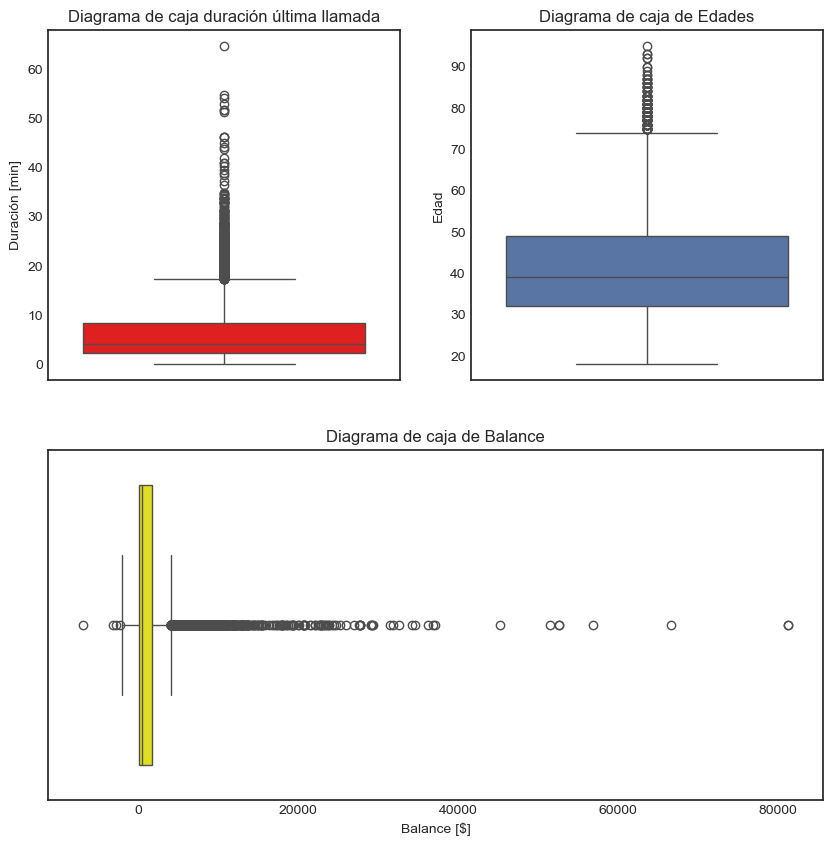

In [47]:
plt.style.use("seaborn-v0_8-deep")
#fig, axs = plt.subplots(2, 2,figsize=(10, 10))   

fig, axs = plt.subplot_mosaic([['left', 'right'],
                               ['bottom', 'bottom']],figsize=(10, 10))


# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
#custom_palette = ['skyblue', 'salmon']
sns.boxplot(y='duration_min', data=df_bank,ax=axs['left'],color='red')
axs['left'].set_title('Diagrama de caja duración última llamada')

#set_xticks para fixar el eje x cn solo dos ticks y así evitar el warning cuando renombre los set_xticklabels
#axs.set_ylim(0, 20)
#axs.set_xticklabels(['No', 'Sí'])
axs['left'].set_ylabel('Duración [min]')
#axs.set_ylabel('duración [min]')
#axs.legend(title="Contratación depósito", labels=["No", "Sí"])

# Para evitar solapamiento entre los gráficos
#plt.tight_layout()  
# Mostrar los dos gráficos juntos


sns.boxplot(y='age', data=df_bank,ax=axs['right'])
axs['right'].set_title('Diagrama de caja de Edades')
axs['right'].set_ylabel('Edad')

sns.boxplot(x='balance', data=df_bank,ax=axs['bottom'],color='yellow')
axs['bottom'].set_title('Diagrama de caja de Balance')
axs['bottom'].set_xlabel('Balance [$]')

plt.show()


Tanto en duración de las llamadas, como en la edad, como en el Balance apreciamos outliers. Parece ser que en Duración y el Balance, la presencia de Outliers es muy superior. Vamos a cuantificarlos, y calcular el porcentaje de outliers, extremos y leves. Haremos una función que dada una columna numérica de un DataFrame, que será una serie, me devuelva una serie, donde me indique por cada valor de la serie, si es un valor es no anómalo (0), si es outliers leve (1) o si es un outlier extremo (2).

In [48]:
#Función que dada una série de valores numéricos, devuelve una serie de la misma longitud, donde existen valores 0, 1 y 2. 
#Es la etiqueta de que el valor no és outlier, 1, outlier leve y 2 outlier extremo.
def outliers(s):

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para identificar valores atípicos leves
    li_inf_outliers_leves = Q1 - 1.5 * IQR
    li_sup_outliers_leves = Q3 + 1.5 * IQR

    print(f"El limite inferior leve es de {li_inf_outliers_leves}")
    print(f"El limite superior leve es de {li_sup_outliers_leves}")

    # Definir límites para identificar valores atípicos extremos
    li_inf_outliers_extr = Q1 - 3 * IQR
    li_sup_outliers_extr = Q3 + 3 * IQR

    print(f"El limite inferior extremo es de {li_inf_outliers_extr}")
    print(f"El limite superior extremo es de {li_sup_outliers_extr}")


    # Identificar valores atípicos
    atipicos_leves = (s < li_inf_outliers_leves) | (s > li_sup_outliers_leves)
    atipicos_extr=(s < li_inf_outliers_extr) | (s > li_sup_outliers_extr)

    df=pd.DataFrame({"atipicos_leves":atipicos_leves.values,"atipicos_extr":atipicos_extr.values})
    

    condiciones=[((df["atipicos_leves"]==True) & (df["atipicos_extr"]==True)),
                 ((df["atipicos_leves"]==True) & (df["atipicos_extr"]==False)),
                 ((df["atipicos_leves"]==False) & (df["atipicos_extr"]==False))   
                 ]
    resultados_condiciones=[2,1,0]
    df["outliers"]=np.select(condiciones,resultados_condiciones,default=-1)
   
    return df["outliers"]


**Estudio anómalos Balance**

Añado una columna de outliers de balance y miro sus resultados

In [49]:
df_bank["outliers_balance"]=outliers(df_bank["balance"])
df_bank["outliers_balance"].value_counts()

El limite inferior leve es de -2257.0
El limite superior leve es de 4087.0
El limite inferior extremo es de -4636.0
El limite superior extremo es de 6466.0


outliers_balance
0    10107
1      543
2      512
Name: count, dtype: int64

In [50]:
df_bank[(df_bank["outliers_balance"]==2) & (df_bank["balance"]>0)]["balance"].sort_values(ascending=True).head()

2638     6468
2775     6481
10966    6507
9910     6507
7740     6512
Name: balance, dtype: int64

Verifico que el mínimo valor de los outliers extremos es superior al límite inferior de 6466, así veo que la función que he creado és correcta.

In [51]:
#No puedo transponer una serie, tengo que convertirla a DataFrame
pd.DataFrame(df_bank["balance"].describe()).T

,count,mean,std,min,25%,50%,75%,max
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0


In [52]:
balance_sin_extremos=df_bank[(df_bank["outliers_balance"]!=2)]["balance"]
pd.DataFrame(balance_sin_extremos.describe()).T

,count,mean,std,min,25%,50%,75%,max
balance,10650.0,1023.656432,1353.786638,-3058.0,107.0,495.0,1444.0,6445.0


Los outliers extremos modifican mucho la media. En realidad ya sabíamos que pasaba, pues la media y la mediana sin quitar outliers ya era muy distinta. La media de 1528,53 y la mediana de 550. 

In [53]:
balance_sin_outliers=df_bank[(df_bank["outliers_balance"]==0)]["balance"]
pd.DataFrame(balance_sin_outliers.describe()).T

,count,mean,std,min,25%,50%,75%,max
balance,10107.0,809.882557,997.790839,-2049.0,94.0,443.0,1228.0,4087.0


Vamos a ver los porcenajes

In [54]:
por_outliers_balance_extr=(df_bank[(df_bank["outliers_balance"]==2)]["balance"].size)/(df_bank.shape[0])
por_outliers_balance_leves=(df_bank[(df_bank["outliers_balance"]==1)]["balance"].size)/(df_bank.shape[0])
df_por_out_balance=pd.DataFrame({"por_outliers_extr":f'{round(por_outliers_balance_extr*100,2)}%',
                                 "por_outliers_leves":f'{round(por_outliers_balance_leves*100,2)}%'},
                                  index=["outliers"])
df_por_out_balance

,por_outliers_extr,por_outliers_leves
outliers,4.59%,4.86%


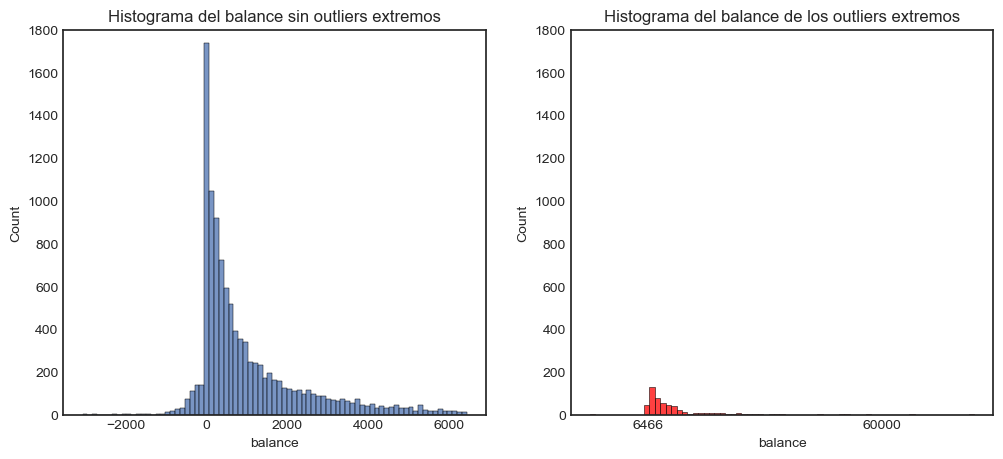

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_bank[(df_bank["outliers_balance"]<2)], ax=axs[0],x="balance", kde=False)
axs[0].set_title('Histograma del balance sin outliers extremos')
axs[0].set_ylim(0, 1800)
sns.histplot(data=df_bank[(df_bank["outliers_balance"]==2)], ax=axs[1],x="balance", kde=False,color='red')
axs[1].set_title('Histograma del balance de los outliers extremos')
axs[1].set_xticks([6466, 60000])
axs[1].set_ylim(0, 1800)

plt.show()

Claramente vemos como el balance de los outliers extremos tiene una distribución muy distinta, a los de la población incluyendo outliers leves. De momento,
para no contaminar nuestro estudio con otra tipología de clientes, creemos que deberíams excluiremos de nuestro estudio los outliers extremos (512 registros). Eso sí de momento postpondremos esta decisión hasta que avancemos más con el estudio y las correlaciones.

**Estudio anómalos Duracion**

Añado una columna de outliers de duración y miro sus resultados

In [56]:
df_bank["outliers_duration_min"]=outliers(df_bank["duration_min"])
df_bank["outliers_duration_min"].value_counts()

El limite inferior leve es de -6.700000000000002
El limite superior leve es de 17.300000000000004
El limite inferior extremo es de -15.700000000000003
El limite superior extremo es de 26.300000000000004


outliers_duration_min
0    10540
1      513
2      109
Name: count, dtype: int64

In [57]:
df_bank[df_bank["outliers_duration_min"]==2]["duration_min"].sort_values(ascending=True).head()

489     26.4
4605    26.6
1467    26.6
1036    26.6
5120    26.6
Name: duration_min, dtype: float64

In [58]:
pd.DataFrame(df_bank["duration_min"].describe()).T

,count,mean,std,min,25%,50%,75%,max
duration_min,11162.0,6.199901,5.785872,0.0,2.3,4.2,8.3,64.7


In [59]:
duration_sin_extremos=df_bank[(df_bank["outliers_duration_min"]!=2)]["duration_min"]
pd.DataFrame(duration_sin_extremos.describe()).T

,count,mean,std,min,25%,50%,75%,max
duration_min,11053.0,5.934886,5.105636,0.0,2.3,4.2,8.0,26.3


In [60]:
duration_sin_extremos=df_bank[(df_bank["outliers_duration_min"]==0)]["duration_min"]
pd.DataFrame(duration_sin_extremos.describe()).T

,count,mean,std,min,25%,50%,75%,max
duration_min,10540.0,5.213643,3.977725,0.0,2.2,4.0,7.2,17.3


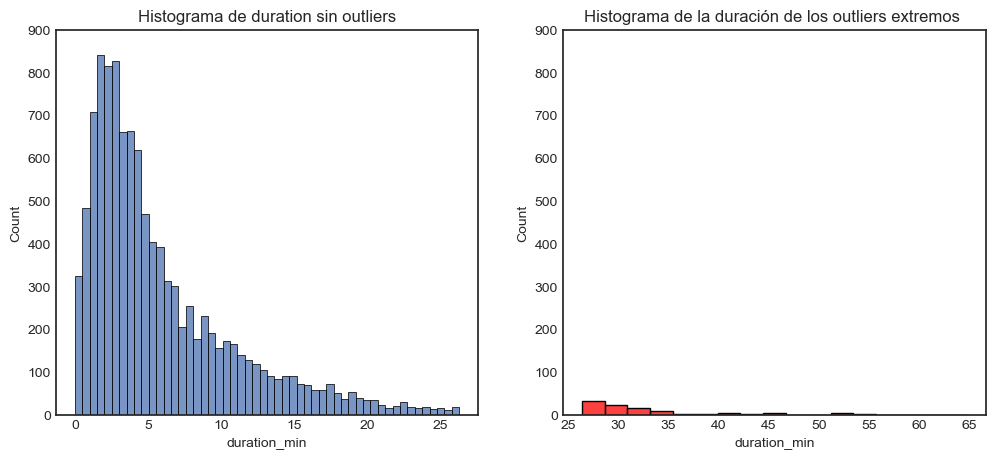

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_bank[(df_bank["outliers_duration_min"]<2)], ax=axs[0],x="duration_min", kde=False)
axs[0].set_title('Histograma de duration sin outliers')
axs[0].set_ylim(0, 900)
sns.histplot(data=df_bank[(df_bank["outliers_duration_min"]==2)], ax=axs[1],x="duration_min", kde=False,color='red')
axs[1].set_title('Histograma de la duración de los outliers extremos ')
axs[1].set_ylim(0, 900)
#axs[1].set_xticks([6466, 60000])

plt.show()

En este caso también vemos que los outliers extremos también tienen un comportamiento bastante fuera de lo habitual de la distribución de la izquierda,
que incluye outliers leves.


**¿Cuántos oulters extremos de duracion también són outliers extremos de balance?**

In [62]:
is_outliers_ext_balance_and_duration=(df_bank["outliers_balance"]==2) & (df_bank["outliers_duration_min"]==2)
is_outliers_ext_balance_and_duration.value_counts()

False    11158
True         4
Name: count, dtype: int64

Pues solo habría 4 clientes que tuvieran valores extremos de balance y valores extremos de duración. Eso significa, que si quitamos los 109 clientes de duración extremos, 104, tendrían una balance adecuado y los estaríamos eliminando. Así pues en este caso, mantendremos estos outliers extremos. 

**Estudio anómalos Edad**

Añado una columna de outliers de edad y miro sus resultados

In [63]:
df_bank["outliers_age"]=outliers(df_bank["age"])
df_bank["outliers_age"].value_counts()

El limite inferior leve es de 6.5
El limite superior leve es de 74.5
El limite inferior extremo es de -19.0
El limite superior extremo es de 100.0


outliers_age
0    10991
1      171
Name: count, dtype: int64

In [64]:
df_bank[df_bank["outliers_age"]==1]["age"].sort_values(ascending=True).head()

1162    75
9043    75
6994    75
6227    75
5084    75
Name: age, dtype: int32

In [65]:
pd.DataFrame(df_bank["age"].describe()).T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.233919,11.910533,18.0,32.0,39.0,49.0,95.0


In [66]:
edad_sin_leves=df_bank[(df_bank["outliers_age"]!=1)]["age"]
pd.DataFrame(edad_sin_leves.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,10991.0,40.63552,10.973207,18.0,32.0,38.0,48.0,74.0


No eliminaremos outliers de la edad ya que vemos que no hay cambios apreciables quitando los outliers

**Estudio anómalos campaign**

Añado una columna de outliers de campaign y miro sus resultados

In [67]:
df_bank["outliers_campaign"]=outliers(df_bank["campaign"])
df_bank["outliers_campaign"].value_counts()

El limite inferior leve es de -2.0
El limite superior leve es de 6.0
El limite inferior extremo es de -5.0
El limite superior extremo es de 9.0


outliers_campaign
0    10561
1      339
2      262
Name: count, dtype: int64

In [68]:
df_bank[df_bank["outliers_campaign"]==2]["campaign"].sort_values(ascending=True).head()

6224    10
6602    10
9760    10
6110    10
5978    10
Name: campaign, dtype: int64

In [69]:
pd.DataFrame(df_bank["campaign"].describe()).T

,count,mean,std,min,25%,50%,75%,max
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.0,63.0


In [70]:
campaign_sin_extremos=df_bank[(df_bank["outliers_campaign"]!=2)]["campaign"]
pd.DataFrame(campaign_sin_extremos.describe()).T

,count,mean,std,min,25%,50%,75%,max
campaign,10900.0,2.20422,1.602864,1.0,1.0,2.0,3.0,9.0


Vemos que la media es muy parecida a la mediana, y aún quitando anómalos extremos no cambia mucho.

In [71]:
def son_outliers_extr_o_no(valor):
    if valor==2:
        return 1
    else:
        return 0

df_bank["outliers_extr_o_no_campaign"]=df_bank["outliers_campaign"].apply(son_outliers_extr_o_no)

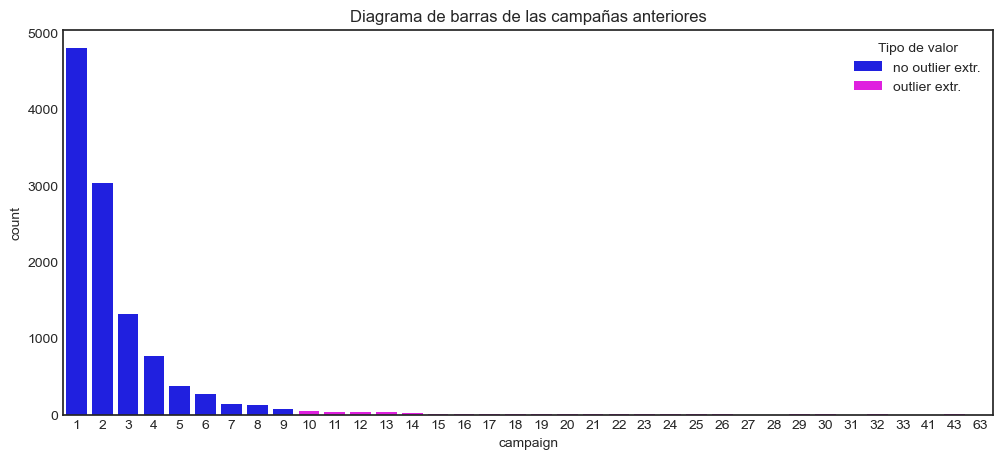

In [72]:
fig, ax = plt.subplots(figsize=(12, 5))

g=sns.countplot(data=df_bank,x="campaign",hue="outliers_extr_o_no_campaign",palette=["#0000FF","#FF00FF"])
ax.set_title('Diagrama de barras de las campañas anteriores')
ax.legend(title="Tipo de valor", labels=["no outlier extr.", "outlier extr."])
plt.show()

Si visualizamos los outliers extremos de campañas, vemos que tienen una tendencia gradual a disminuir, por tanto no parece una población a parte.


In [73]:
is_extr_balance_and_is_extr_campaign=(df_bank["outliers_balance"]==2) & (df_bank["outliers_campaign"]==2)
is_extr_balance_and_is_extr_campaign.value_counts()

False    11150
True        12
Name: count, dtype: int64

En este caso solo habría 12 registros con campañas extremas. Si lo ponemos en la misma 

In [74]:
is_num_campaign=df_bank["campaign"]==1
df_bank[is_num_campaign]["campaign"].size
df_bank.shape[0]

11162

In [75]:
lista_por=[]

for i in range(1,11):
    is_num_campaign=df_bank["campaign"]==i
    por=round((df_bank[is_num_campaign]["campaign"].size)/(df_bank.shape[0])*100,2)
    lista_por.append(por)


lista_por



[42.99, 27.13, 11.83, 6.91, 3.39, 2.37, 1.25, 1.15, 0.65, 0.47]

Vemos que el 42,99% de valores de campaign es de campaign=1, y con campaign=2, 27,13%. No consideramos que estos valores esten tan desbalanceados. 

In [76]:
df_bank.head()

,job,default,balance,housing,loan,contact,day,month,duration,campaign,...,index_temp,age,marital,education,duration_min,outliers_balance,outliers_duration_min,outliers_age,outliers_campaign,outliers_extr_o_no_campaign
0,admin.,0,2343,1,0,unknown,5,may,1042,1,...,0,59,married,secondary,17.4,0,1,0,0,0
1,admin.,0,45,0,0,unknown,5,may,1467,1,...,1,56,married,secondary,24.4,0,1,0,0,0
2,technician,0,1270,1,0,unknown,5,may,1389,1,...,2,41,married,secondary,23.2,0,1,0,0,0
3,services,0,2476,1,0,unknown,5,may,579,1,...,3,55,married,secondary,9.6,0,0,0,0,0
4,admin.,0,184,0,0,unknown,5,may,673,2,...,4,54,married,tertiary,11.2,0,0,0,0,0


**Estudio anómalos previous**

In [77]:
df_bank["outliers_previous"]=outliers(df_bank["previous"])
df_bank["outliers_previous"].value_counts()

El limite inferior leve es de -1.5
El limite superior leve es de 2.5
El limite inferior extremo es de -3.0
El limite superior extremo es de 4.0


outliers_previous
0    9904
1     679
2     579
Name: count, dtype: int64

In [78]:
df_bank[df_bank["outliers_previous"]==2]["previous"].sort_values(ascending=True).head()

11160    5
3177     5
3185     5
4397     5
3189     5
Name: previous, dtype: int64

In [79]:
pd.DataFrame(df_bank["previous"].describe()).T

,count,mean,std,min,25%,50%,75%,max
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.0,58.0


In [80]:
previous_sin_extremos=df_bank[(df_bank["outliers_previous"]!=2)]["previous"]
pd.DataFrame(previous_sin_extremos.describe()).T

,count,mean,std,min,25%,50%,75%,max
previous,10583.0,0.430313,0.948412,0.0,0.0,0.0,0.0,4.0


In [81]:
previous_sin_outliers=df_bank[(df_bank["outliers_previous"]==0)]["campaign"]
pd.DataFrame(previous_sin_outliers.describe()).T

,count,mean,std,min,25%,50%,75%,max
campaign,9904.0,2.56149,2.83628,1.0,1.0,2.0,3.0,63.0


Parece ser que aquí sí tenemos bastantes diferencias de comportamiento entre número de llamadas de la campaña anterior.

In [82]:
def son_outliers_o_no(valor):
    if valor==0:
        return 1
    else:
        return 0

df_bank["outliers_o_no_previous"]=df_bank["outliers_previous"].apply(son_outliers_o_no)

La anterior función como antes, es solo para identificar si son o no outliers en un mismo gráfico

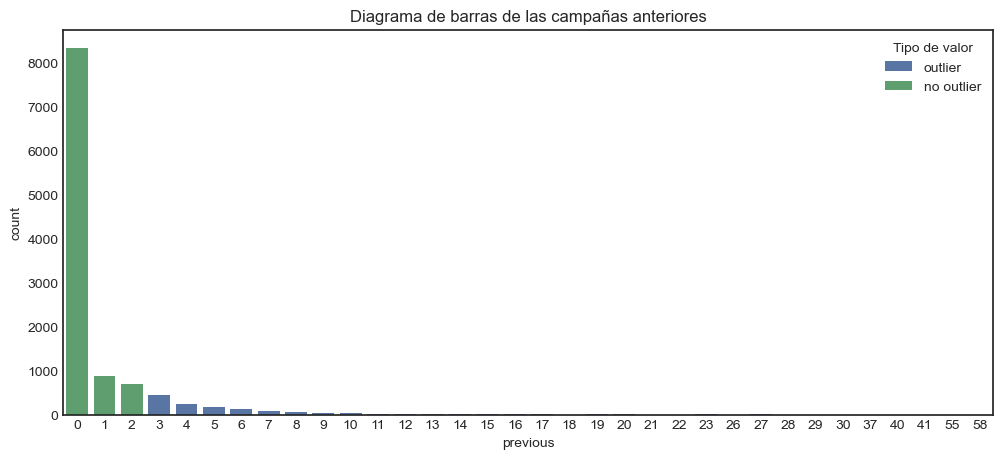

In [83]:
fig, ax = plt.subplots(figsize=(12, 5))

g=sns.countplot(data=df_bank,x="previous",hue="outliers_o_no_previous")
ax.set_title('Diagrama de barras de las campañas anteriores')
ax.legend(title="Tipo de valor", labels=["outlier", "no outlier"])

#ax.set_ylim(0, 9000)


En este caso sí que vemos que previous=0, tiene el 74,57% de los registros, y esto está muy desbalanceado respecto otros valores que pueda tomar previous. Lo atacaremos posteriormente en el estudio de balanceo.

In [84]:
#Este seria el df sin outliers extremos de balance. 

df_bank_sin_out=df_bank[df_bank["outliers_balance"]!=2]
df_bank_sin_out=df_bank_sin_out.copy()

df_bank_sin_out sería el df_bank sin outliers extremos de balance. De momento para el análisis de correlaciones utilizaremos aún df_bank.

## 16. Análisis de correlaciones entre variables

### 16.1 Correlaciones entre variables numéricas y la variable objetivo depósito binaria (1,0)

**Correlación entre balance y depósito por el método Análisis discriminante Lineal LDA**

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Aplicamos LDA
lda = LinearDiscriminantAnalysis()

X = df_bank[['balance']]
y = df_bank['deposit']
lda.fit(X, y)

# Imprimimos la media de cada clase proyectada en el eje discriminante
print("Orden de las clases en lda.means_:", lda.classes_)
print("Medias de cada clase proyectadas en el eje discriminante:", lda.means_)
print("Coeficiente de separación (coeficientes de la proyección):", lda.coef_)
print("Desviación estándar balance:", df_bank['balance'].std())

Orden de las clases en lda.means_: [0 1]
Medias de cada clase proyectadas en el eje discriminante: [[1280.22714115]
 [1804.26791454]]
Coeficiente de separación (coeficientes de la proyección): [[5.07017935e-05]]
Desviación estándar balance: 3225.4133259461923


In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Aplicamos LDA
lda = LinearDiscriminantAnalysis()

X = df_bank_sin_out[['balance']]
y = df_bank_sin_out['deposit']
lda.fit(X, y)

# Imprimimos la media de cada clase proyectada en el eje discriminante
print("Orden de las clases en lda.means_:", lda.classes_)
print("Medias de cada clase proyectadas en el eje discriminante:", lda.means_)
print("Coeficiente de separación (coeficientes de la proyección):", lda.coef_)
print("Desviación estándar balance:", df_bank_sin_out['balance'].std())

Orden de las clases en lda.means_: [0 1]
Medias de cada clase proyectadas en el eje discriminante: [[ 860.50194553]
 [1208.29923939]]
Coeficiente de separación (coeficientes de la proyección): [[0.00019292]]
Desviación estándar balance: 1353.7866377251207


Tano sin outliers como con con outliers el coeficiente de separación es muy bajo y por lo tanto no discrimina. Así pues no parece que el balance tenga incidencia en contratar un depósito. Pero si vemos que la media con depósito=0 sin outliers es de  860 y con outliers es de 1280 y con depósito=1 con outliers de 1804 y sin outliers de 1208. Por solo un 4% de clientes las medias cambian demasiado.

Text(0.5, 1.0, 'Histograma del balance sin outliers extremos')

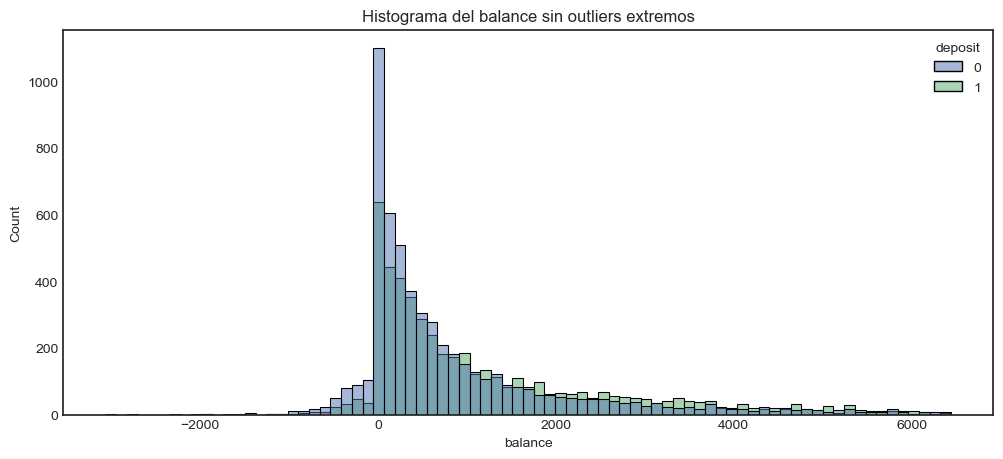

In [87]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_bank_sin_out, x="balance", kde=False,hue='deposit')
ax.set_title('Histograma del balance sin outliers extremos')


Aquí verificamos que el balance no discrimina en qué tengamos depósit 1 o 0, ya que están solapadas las dos distribuciones

**Correlación entre edad y depósito por el método Análisis discriminante Lineal LDA**

In [88]:
# Aplicamos LDA
lda = LinearDiscriminantAnalysis()

X = df_bank[['age']]
y = df_bank['deposit']
lda.fit(X, y)

# Imprimimos la media de cada clase proyectada en el eje discriminante
print("Orden de las clases en lda.means_:", lda.classes_)
print("Medias de cada clase proyectadas en el eje discriminante:", lda.means_)
print("Coeficiente de separación (coeficientes de la proyección):", lda.coef_)
print("Desviación estándar edad:", df_bank_sin_out['age'].std())

Orden de las clases en lda.means_: [0 1]
Medias de cada clase proyectadas en el eje discriminante: [[40.84215903]
 [41.66893553]]
Coeficiente de separación (coeficientes de la proyección): [[0.00583457]]
Desviación estándar edad: 11.824295893298341


La edad tampoco discriminaria mucho en con contratar o no un depósito según parece, aunque el coeficiente de separación es más alto que en el anterior caso.

Text(0.5, 1.0, 'Histograma de la edad por depósito')

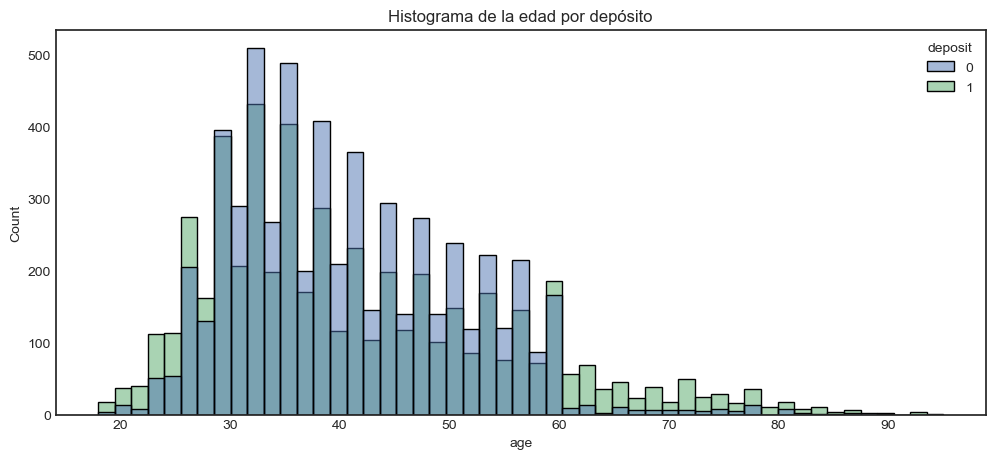

In [89]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_bank, x="age", kde=False,hue='deposit')
ax.set_title('Histograma de la edad por depósito')

**Correlación entre duración y depósito por el método Análisis discriminante Lineal LDA**

In [90]:
# Aplicamos LDA
lda = LinearDiscriminantAnalysis()

X = df_bank[['duration_min']]
y = df_bank['deposit']
lda.fit(X, y)

# Imprimimos la media de cada clase proyectada en el eje discriminante
print("Orden de las clases en lda.means_:", lda.classes_)
print("Medias de cada clase proyectadas en el eje discriminante:", lda.means_)
print("Coeficiente de separación (coeficientes de la proyección):", lda.coef_)
print("Desviación estándar edad:", df_bank_sin_out['duration_min'].std())

Orden de las clases en lda.means_: [0 1]
Medias de cada clase proyectadas en el eje discriminante: [[3.71890005]
 [8.95484969]]
Coeficiente de separación (coeficientes de la proyección): [[0.1965221]]
Desviación estándar edad: 5.796410551717679


El análisis discriminante lineal, me diría que no podemos asegurar que la duración discrimine si puede o no contratarse un depósito

Text(0.5, 1.0, 'Histograma de la duration_min por depósito')

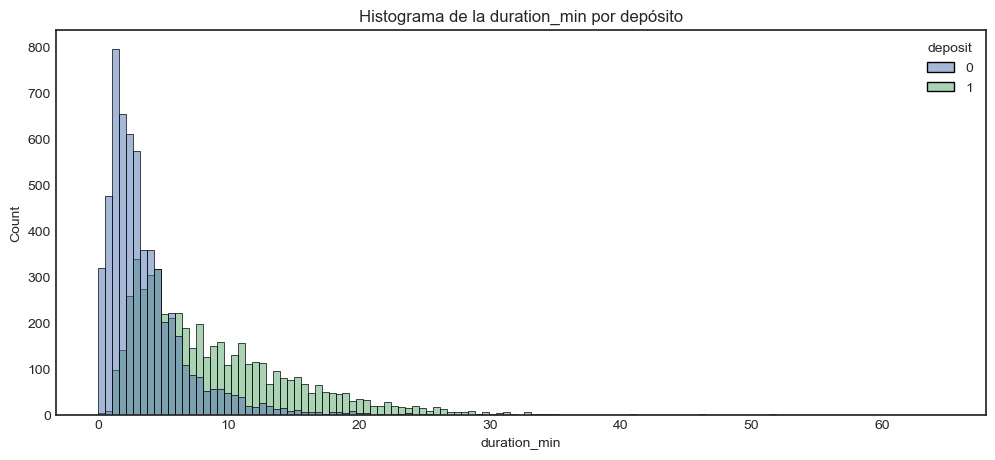

In [91]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_bank, x="duration_min", kde=False,hue='deposit')
ax.set_title('Histograma de la duration_min por depósito')

En este caso si existe un poco más de discriminación respecto los casos anterior. Para duraciones más altas de 18 mintuos, la tendencia es que se contrate un depósito.

### 16.2 Correlaciones entre variables categóricas y la variable objetivo depósito binaria (1,0)

Nota: Al final de este apartado 16.2 muestro un resumen de todas las correlaciones Chi-cuadrado, con los p-valor y valor chi2_stat.

**Correlación entre job y depósito por el método Chi-cuadrado**

In [92]:
import scipy.stats as stats

# Crear la tabla de contingencia entre 'job' y 'hipoteca'
contingency_table = pd.crosstab(df_bank["job"], df_bank["deposit"])
# Aplicar la prueba de Chi-cuadrado
chi2_stat_job, p_value_job, dof, expected = stats.chi2_contingency(contingency_table)

# Imprimir los resultados
#print("Tabla de Contingencia:")
#print(contingency_table, "\n")

#print("Resultados de la Prueba de Chi-cuadrado:")
#print(f"Estadístico Chi-cuadrado: {chi2_stat_job}")
#print(f"P-valor: {p_value_job}")
#print(f"Grados de libertad: {dof}")
#print("Frecuencias esperadas:")
#print(expected)

**Correlación entre education y depósito por el método Chi-Cuadrado**

In [93]:
import scipy.stats as stats
contingency_table = pd.crosstab(df_bank["education"], df_bank["deposit"])

# Aplicar la prueba de Chi-cuadrado
chi2_stat_education, p_value_education, dof, expected = stats.chi2_contingency(contingency_table)


**Correlación entre marital y depósito por el método Chi-Cuadrado**

In [94]:
import scipy.stats as stats

contingency_table = pd.crosstab(df_bank["marital"], df_bank["deposit"])

# Aplicar la prueba de Chi-cuadrado
chi2_stat_marital, p_value_marital, dof, expected = stats.chi2_contingency(contingency_table)


**Correlación entre housing y depósito por el método Chi-Cuadrado**

In [95]:
import scipy.stats as stats
contingency_table = pd.crosstab(df_bank["housing"], df_bank["deposit"])

# Aplicar la prueba de Chi-cuadrado
chi2_stat_housing, p_value_housing, dof, expected = stats.chi2_contingency(contingency_table)


**Correlación entre loan y depósito por el método Chi-Cuadrado**

In [96]:
import scipy.stats as stats

contingency_table = pd.crosstab(df_bank["loan"], df_bank["deposit"])
# Aplicar la prueba de Chi-cuadrado
chi2_stat_loan, p_value_loan, dof, expected = stats.chi2_contingency(contingency_table)


**Correlación entre contact y depósito por el método Chi-Cuadrado**

In [97]:
import scipy.stats as stats
contingency_table = pd.crosstab(df_bank["contact"], df_bank["deposit"])
# Aplicar la prueba de Chi-cuadrado
chi2_stat_contact, p_value_contact, dof, expected = stats.chi2_contingency(contingency_table)


**Correlación entre pdays y depósito por el método Chi-Cuadrado**

In [98]:
import scipy.stats as stats
# Crear la tabla de contingencia entre 'job' y 'hipoteca'
contingency_table = pd.crosstab(df_bank["pdays"], df_bank["deposit"])

# Aplicar la prueba de Chi-cuadrado
chi2_stat_pdays, p_value_pdays, dof, expected = stats.chi2_contingency(contingency_table)


**Correlación entre default y depósito por el método Chi-Cuadrado**

In [99]:
import scipy.stats as stats

# Crear la tabla de contingencia entre 'job' y 'hipoteca'
contingency_table = pd.crosstab(df_bank["default"], df_bank["deposit"])

# Aplicar la prueba de Chi-cuadrado
chi2_stat_default, p_value_default, dof, expected = stats.chi2_contingency(contingency_table)

**Correlación entre campaign y depósito por el método Chi-Cuadrado**

Consideramos a campaign como una variable categórica ya que es numérica con valores discretos pero limitados

In [100]:
import scipy.stats as stats

contingency_table = pd.crosstab(df_bank["campaign"], df_bank["deposit"])

# Aplicar la prueba de Chi-cuadrado
chi2_stat_campaign, p_value_campaign, dof, expected = stats.chi2_contingency(contingency_table)

**Correlación entre previous y depósito por el método Chi-Cuadrado**

In [101]:
import scipy.stats as stats
contingency_table = pd.crosstab(df_bank["previous"], df_bank["deposit"])
# Aplicar la prueba de Chi-cuadrado
chi2_stat_previous, p_value_previous, dof, expected = stats.chi2_contingency(contingency_table)

**Resumen correlaciones anteriores por el método Chi-cuadrado**

In [102]:
dict={'p_value': [p_value_job, p_value_education,p_value_marital,p_value_housing,p_value_loan,p_value_contact,p_value_default,p_value_campaign,p_value_previous],
     'chi2_stat':[chi2_stat_job,chi2_stat_education,chi2_stat_marital,chi2_stat_housing,chi2_stat_loan,chi2_stat_contact,chi2_stat_default,chi2_stat_campaign,chi2_stat_previous]    
      }

relacio_corr_chi2=pd.DataFrame(dict,index=["job","education","marital","housing","loan","contact","default","campaign","previous"]).sort_values("chi2_stat",ascending=False)
relacio_corr_chi2

,p_value,chi2_stat
contact,1.072803e-160,736.686680
previous,2.627899e-113,638.753009
housing,9.724394e-103,463.189241
job,2.741690e-74,378.075256
campaign,8.897635e-33,241.986305
loan,2.171287e-31,135.832171
education,5.289027e-27,121.008326
marital,2.455604e-24,108.727339
default,2.442800e-05,17.808574


Parece ser que **contact y previous** tendrían más correlacion que las otras variables categóricas frente a depósit.

### 16.3 Correlaciones para ver colinealidad entre variables numéricas (no contra variable objetivo)

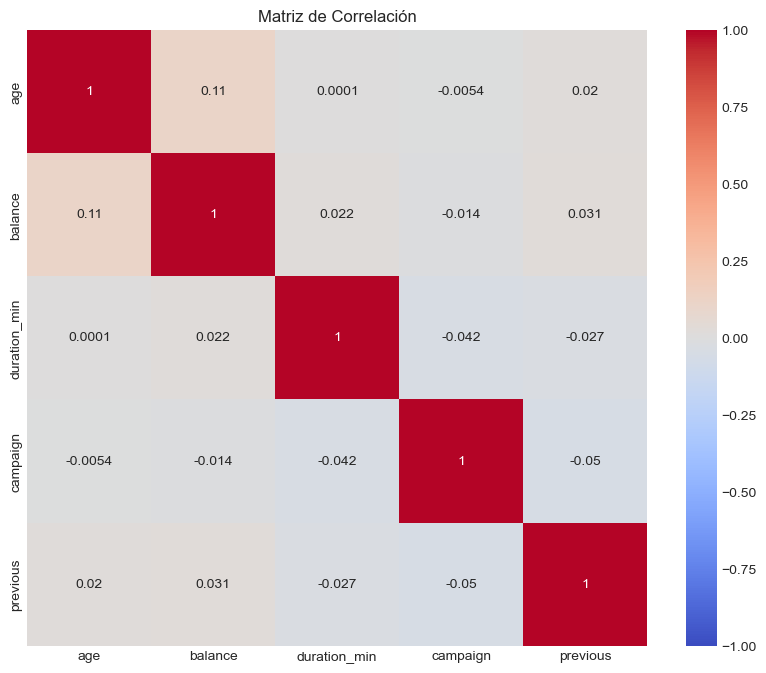

In [103]:
# Importar Llibreries Necessàries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación solo con las variables numéricas que me interesan
correlation = df_bank[["age","balance","duration_min","campaign","previous"]].corr(numeric_only=True)

# Visualitzar la matriu de correlació amb un mapa de calor

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


Los resultados muestran que no existe correlación entre variables o que es muy baja. Pero como podría ser que la relación fuera no lineal (implica correlación de pearson baja), para asegurarnos haremos un pairplot para visualizar los diferentes gráficos de dispersión.

Text(0.5, 1.05, 'Gráfico de dispersión entre age,balance,duration_min,campaign,y previous')

<Figure size 1000x500 with 0 Axes>

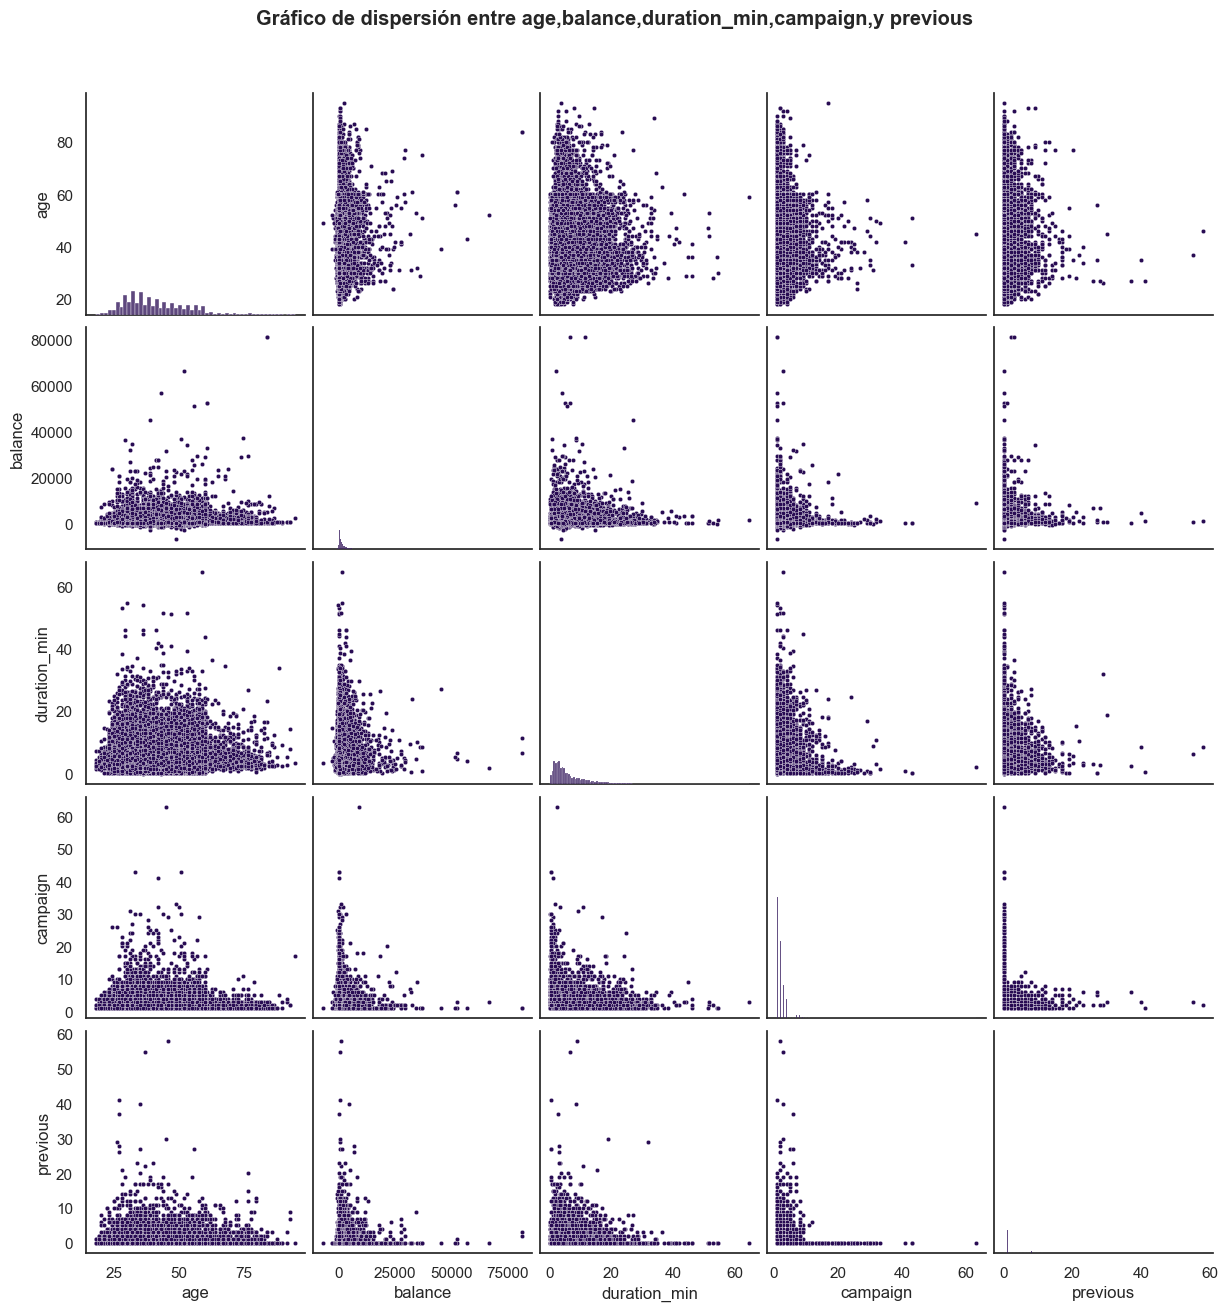

In [104]:
plt.figure(figsize=(10, 5))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook",style="white", palette="inferno",rc=custom_params)              
axs=sns.pairplot(data=df_bank,
            vars=["age","balance","duration_min","campaign","previous"],plot_kws={'s': 10})
 
axs.figure.suptitle("Gráfico de dispersión entre age,balance,duration_min,campaign,y previous",y=1.05,fontweight='bold')
 

Lo que ya intuíamos en la matriz de correlación (corelaciones muy bajas) no dislumbramos tampoco ninguna relación clara no  lineal entre las variables numéricas.

Text(0.5, 1.05, 'Gráfico de dispersión sin outliers extremos (balance) entre age,balance,duration_min,campaign,y previous')

<Figure size 1000x500 with 0 Axes>

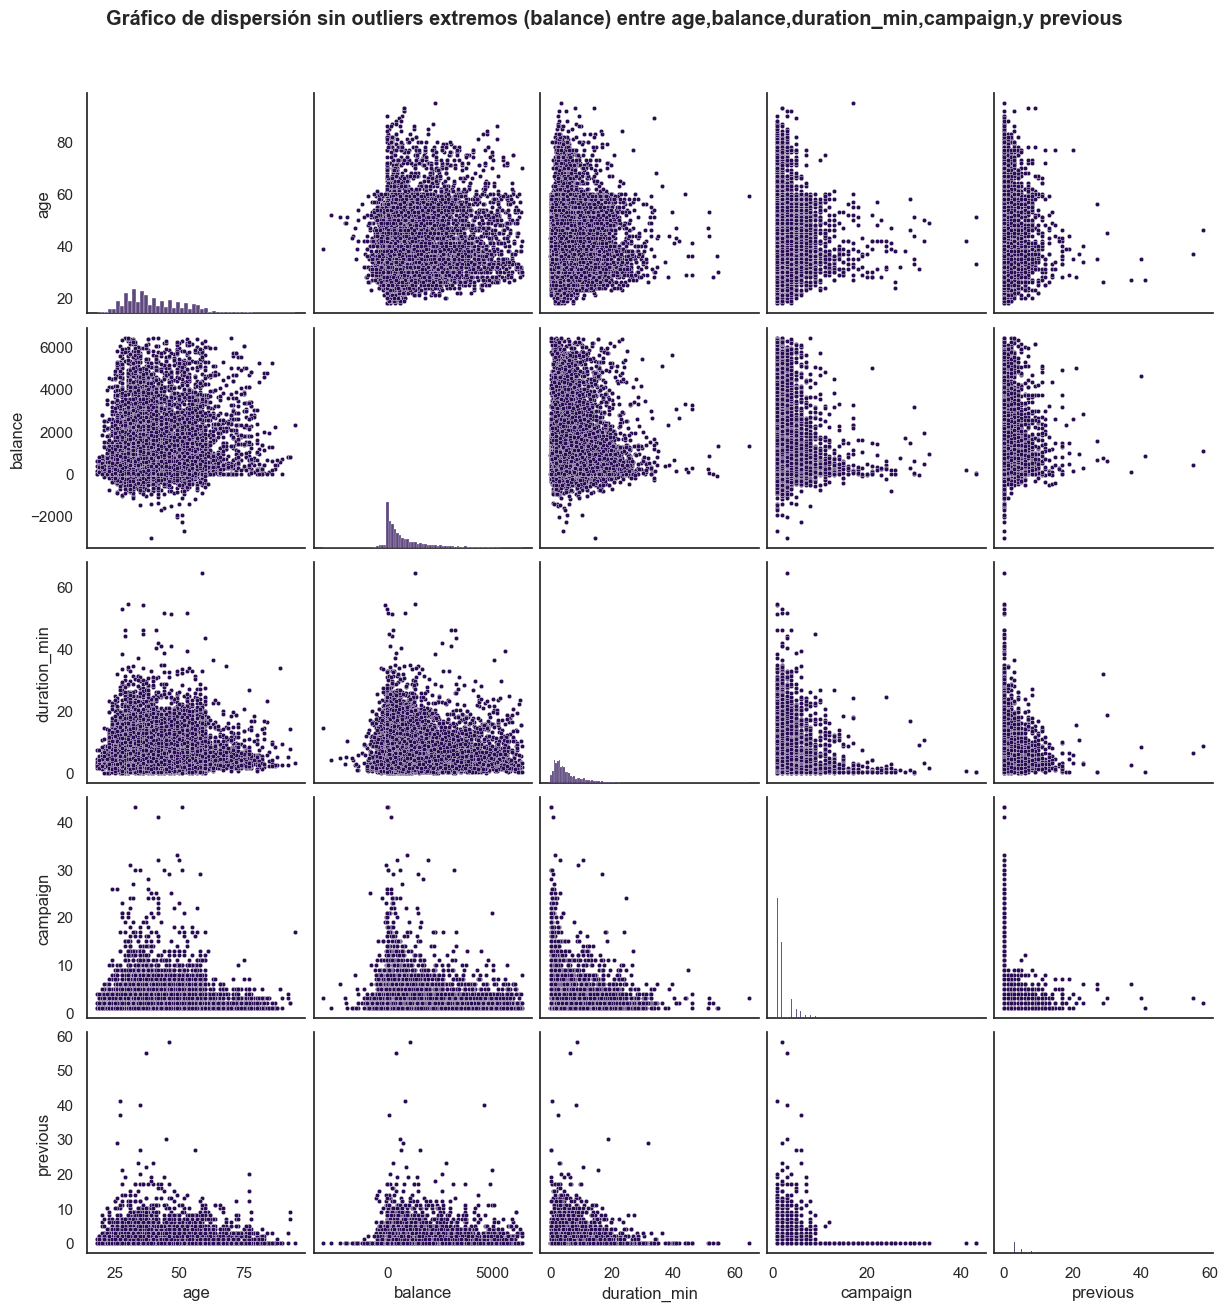

In [105]:
plt.figure(figsize=(10, 5))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook",style="white", palette="inferno",rc=custom_params)              
axs=sns.pairplot(data=df_bank[df_bank["outliers_balance"]!=2],
            vars=["age","balance","duration_min","campaign","previous"],plot_kws={'s': 10})
 
axs.figure.suptitle("Gráfico de dispersión sin outliers extremos (balance) entre age,balance,duration_min,campaign,y previous",y=1.05,fontweight='bold')
 

Sin outliers extremos de balance, obtenemos las mismas conclusiones.

In [106]:
is_balance_extr=df_bank["outliers_balance"]==2
is_balance_extr.value_counts()


outliers_balance
False    10650
True       512
Name: count, dtype: int64

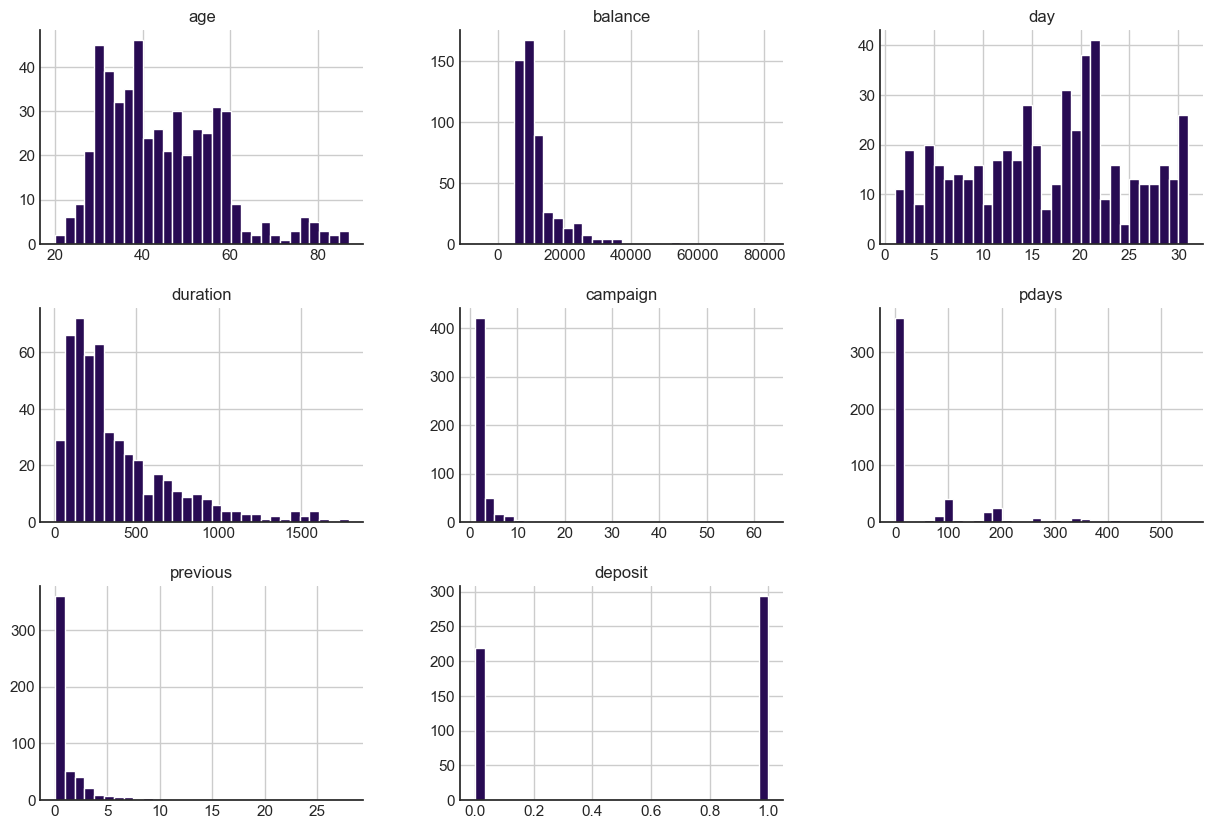

In [107]:
plt.style.use("seaborn-v0_8-white")
columns=["age","balance","day","duration","campaign","pdays","previous","deposit"]
df_bank[columns][is_balance_extr].hist(bins=30, figsize=(15, 10))
plt.show()

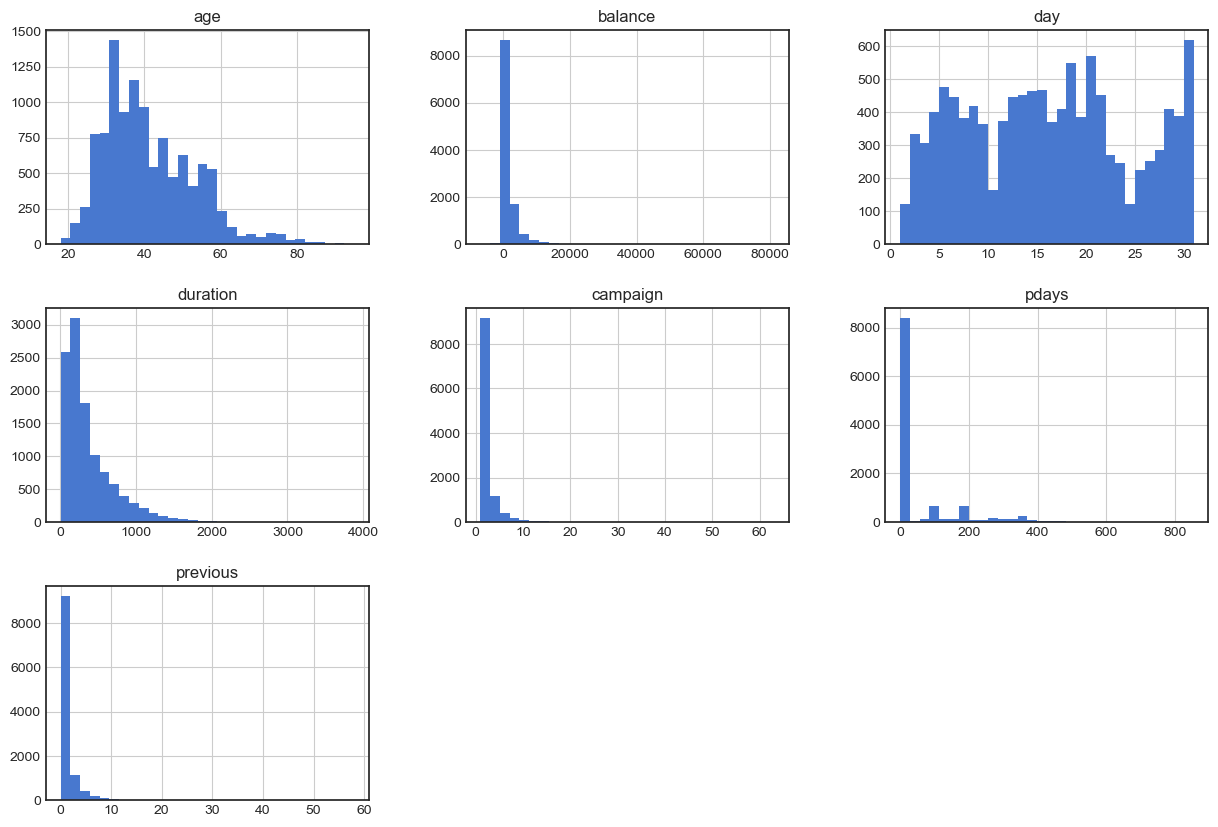

## 17. No hay desbalanceo

In [108]:
#Se comprueba que estan muy balanceados los registros frente a la variable objetivo depósito
df_bank_sin_out["deposit"].value_counts()

deposit
0    5654
1    4996
Name: count, dtype: int64

## 18. Preprocesamiento

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df_bank_sin_out=df_bank[df_bank["outliers_balance"]!=2]

# Aplicamos LDA
lda = LinearDiscriminantAnalysis()

X = df_bank_sin_out[['balance']]
y = df_bank_sin_out['deposit']
lda.fit(X, y)

# Imprimimos la media de cada clase proyectada en el eje discriminante
print("Orden de las clases en lda.means_:", lda.classes_)
print("Medias de cada clase proyectadas en el eje discriminante:", lda.means_)
print("Coeficiente de separación (coeficientes de la proyección):", lda.coef_)
print("Desviación estándar balance:", df_bank_sin_out['balance'].std())

Orden de las clases en lda.means_: [0 1]
Medias de cada clase proyectadas en el eje discriminante: [[ 860.50194553]
 [1208.29923939]]
Coeficiente de separación (coeficientes de la proyección): [[0.00019292]]
Desviación estándar balance: 1353.7866377251207


In [110]:
df_bank_sin_out['contact'].value_counts()

contact
cellular     7662
unknown      2267
telephone     721
Name: count, dtype: int64

### 18.1 Binning de variables numéricas

Vimos que el Análisis de discriminación lineal no separaba muy la variable balance frente a la variable objetivo. Así que haremos dos estrategias de binning. Utilizaremos las medias de el balance para la variable deposito=0 y la media deposito=1 para encontrar los rangos. En ambos casos, un primer rango será el de depósitos negativos, pues consideramos que sí o sí debe tener influencia en la contratación de un depósito.

**Binning de característica balance**

Vimos que el Análisis de discriminación lineal no separaba muy la variable balance frente a la variable objetivo. Así que haremos dos estrategias de binning. Utilizaremos las medias de el balance para la variable deposito=0 y la media deposito=1 para encontrar los rangos. En ambos casos, un primer rango será el de depósitos negativos, pues consideramos que sí o sí debe tener influencia en la contratación de un depósito.

In [111]:
#Primera estrategia para que esten más equilibrados el número de registros por rango. 
balance_q4=df_bank_sin_out['balance'].quantile(0.4)
balance_q7=df_bank_sin_out['balance'].quantile(0.7)
min_balance=round(df_bank_sin_out['balance'].min(),0)
max_balance=round(df_bank_sin_out['balance'].max(),0)


label_balance=['saldo negativo', 'saldo bajo', 'saldo medio', 'saldo alto']
df_bank_sin_out.loc[:,'rango_balance_1'] = pd.cut(df_bank_sin_out['balance'], bins=[min_balance, 0, balance_q4, balance_q7, max_balance], labels=label_balance, include_lowest=True)

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\516582134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'rango_balance_1'] = pd.cut(df_bank_sin_out['balance'], bins=[min_balance, 0, balance_q4, balance_q7, max_balance], labels=label_balance, include_lowest=True)


In [112]:
#Segunda estrategia de encontrar los rangos por medias por variable objetivo
mean_balance_dep_0=round(df_bank_sin_out[df_bank_sin_out['deposit']==0]['balance'].mean(),0)
mean_balance_dep_1=round(df_bank_sin_out[df_bank_sin_out['deposit']==1]['balance'].mean(),0)
min_balance=round(df_bank_sin_out['balance'].min(),0)
max_balance=round(df_bank_sin_out['balance'].max(),0)


# df_bank_sin_out['rango_balance'] = pd.cut(df_bank_sin_out['balance'], bins=[min_balance, 0, mean_balance_dep_0, mean_balance_dep_1, max_balance]) surt un warning
#me dice que use loc
label_balance=['saldo negativo', 'saldo bajo', 'saldo medio', 'saldo alto']
df_bank_sin_out.loc[:,'rango_balance_2'] = pd.cut(df_bank_sin_out['balance'], bins=[min_balance, 0, mean_balance_dep_0, mean_balance_dep_1, max_balance], labels=label_balance, include_lowest=True)

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\4243002411.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'rango_balance_2'] = pd.cut(df_bank_sin_out['balance'], bins=[min_balance, 0, mean_balance_dep_0, mean_balance_dep_1, max_balance], labels=label_balance, include_lowest=True)


Como hay ordinalidad en los rangos de balance, podemos realizar la codificación por etiquetas (por enteros crecientes), siendo el saldo más bajo, el número más bajo.

In [113]:
#Como hay ordinalidad en los rangos de balance, podemos realizar la codificación por etiquetas, siendo el saldo más bajo, el número más bajo.
recod={'saldo negativo':1, 'saldo bajo':2, 'saldo medio':3, 'saldo alto':4}
df_bank_sin_out.loc[:,'recod_rango_balance_1']=df_bank_sin_out['rango_balance_1'].map(recod)

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\4111241302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'recod_rango_balance_1']=df_bank_sin_out['rango_balance_1'].map(recod)


In [114]:
df_bank_sin_out.loc[:,'recod_rango_balance_2']=df_bank_sin_out['rango_balance_2'].map(recod)

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\157016226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'recod_rango_balance_2']=df_bank_sin_out['rango_balance_2'].map(recod)


In [115]:
print(df_bank_sin_out.groupby('rango_balance_1')['deposit'].count())
print(df_bank_sin_out.groupby('rango_balance_2')['deposit'].count())

rango_balance_1
saldo negativo    1461
saldo bajo        2800
saldo medio       3197
saldo alto        3192
Name: deposit, dtype: int64
rango_balance_2
saldo negativo    1461
saldo bajo        5233
saldo medio        847
saldo alto        3109
Name: deposit, dtype: int64


C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\759149331.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_bank_sin_out.groupby('rango_balance_1')['deposit'].count())
C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\759149331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_bank_sin_out.groupby('rango_balance_2')['deposit'].count())


**Chi-cuadrado para ver si escoger binning de rangos_balance_1 o rangos_balance_2**

In [116]:
import scipy.stats as stats

def chi2_cuadro_entre_categorias(df,x,y):

    contingency_table = pd.crosstab(df_bank_sin_out[x], df_bank_sin_out[y])

    # Aplicar la prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # Imprimir los resultados
    print("Tabla de Contingencia:")
    print(contingency_table, "\n")

    print("Resultados de la Prueba de Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi2_stat}")
    print(f"P-valor: {p_value}")
    print(f"Grados de libertad: {dof}")
    print("Frecuencias esperadas:")
    print(expected)
    return(p_value,chi2_stat)


In [117]:
chi2_cuadro_entre_categorias(df_bank_sin_out,x='recod_rango_balance_1',y='deposit')
chi2_cuadro_entre_categorias(df_bank_sin_out,x='recod_rango_balance_2',y='deposit')

Tabla de Contingencia:
deposit                   0     1
recod_rango_balance_1            
1                       959   502
2                      1646  1154
3                      1647  1550
4                      1402  1790 

Resultados de la Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 239.7681195175851
P-valor: 1.068194337384534e-51
Grados de libertad: 3
Frecuencias esperadas:
[[ 775.63323944  685.36676056]
 [1486.49765258 1313.50234742]
 [1697.26178404 1499.73821596]
 [1694.60732394 1497.39267606]]
Tabla de Contingencia:
deposit                   0     1
recod_rango_balance_2            
1                       959   502
2                      2913  2320
3                       420   427
4                      1362  1747 

Resultados de la Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 218.06015641398244
P-valor: 5.272844926898116e-47
Grados de libertad: 3
Frecuencias esperadas:
[[ 775.63323944  685.36676056]
 [2778.15793427 2454.84206573]
 [ 449.66553991  397.33446009]
 

(5.272844926898116e-47, 218.06015641398244)

Escogeremos la estrategia 1, con el rango por percentiles, pues tenemos mejor p-valor y chi-cuadrado.

**Binning de característica age**

In [118]:
age_q33=round(df_bank_sin_out['age'].quantile(0.33))
age_q66=round(df_bank_sin_out['age'].quantile(0.66))
age_min=round(df_bank_sin_out['age'].min(),0)
age_max=round(df_bank_sin_out['age'].max(),0)

label_age=['edad baja', 'edad media', 'edad alta']
df_bank_sin_out.loc[:,'rango_age'] = pd.cut(df_bank_sin_out['age'], bins=[0, age_q33, age_q66, age_max], labels=label_age, include_lowest=True)

recod={'edad baja':1, 'edad media':2, 'edad alta':3}
df_bank_sin_out.loc[:,'recod_rango_age']=df_bank_sin_out['rango_age'].map(recod)


C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\4081631138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'rango_age'] = pd.cut(df_bank_sin_out['age'], bins=[0, age_q33, age_q66, age_max], labels=label_age, include_lowest=True)
C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\4081631138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'recod_rango_age']=df_bank_sin_out['rango_age'].map(recod)


**Binning de característica duration**

In [119]:
duration_q33=round(df_bank_sin_out['duration_min'].quantile(0.33),1)
duration_q66=round(df_bank_sin_out['duration_min'].quantile(0.66),1)
duration_min=round(df_bank_sin_out['duration_min'].min(),1)
duration_max=round(df_bank_sin_out['duration_min'].max(),1)

label_age=['duracion baja', 'duracion media', 'duracion alta']
df_bank_sin_out.loc[:,'rango_duration'] = pd.cut(df_bank_sin_out['duration_min'], bins=[0, duration_q33, duration_q66, duration_max], labels=label_age, include_lowest=True)

recod={'duracion baja':1, 'duracion media':2, 'duracion alta':3}
df_bank_sin_out.loc[:,'recod_duration_min']=df_bank_sin_out['rango_duration'].map(recod)

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\3236941386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'rango_duration'] = pd.cut(df_bank_sin_out['duration_min'], bins=[0, duration_q33, duration_q66, duration_max], labels=label_age, include_lowest=True)
C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\3236941386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'recod_duration_min']=df_bank_sin_out['rango_duration'].map(recod)


In [120]:
df_bank_sin_out

,job,default,balance,housing,loan,contact,day,month,duration,campaign,...,outliers_previous,outliers_o_no_previous,rango_balance_1,rango_balance_2,recod_rango_balance_1,recod_rango_balance_2,rango_age,recod_rango_age,rango_duration,recod_duration_min
0,admin.,0,2343,1,0,unknown,5,may,1042,1,...,0,1,saldo alto,saldo alto,4,4,edad alta,3,duracion alta,3
1,admin.,0,45,0,0,unknown,5,may,1467,1,...,0,1,saldo bajo,saldo bajo,2,2,edad alta,3,duracion alta,3
2,technician,0,1270,1,0,unknown,5,may,1389,1,...,0,1,saldo alto,saldo alto,4,4,edad media,2,duracion alta,3
3,services,0,2476,1,0,unknown,5,may,579,1,...,0,1,saldo alto,saldo alto,4,4,edad alta,3,duracion alta,3
4,admin.,0,184,0,0,unknown,5,may,673,2,...,0,1,saldo bajo,saldo bajo,2,2,edad alta,3,duracion alta,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,0,1,1,0,cellular,20,apr,257,1,...,0,1,saldo bajo,saldo bajo,2,2,edad baja,1,duracion media,2
11158,services,0,733,0,0,unknown,16,jun,83,4,...,0,1,saldo medio,saldo bajo,3,2,edad media,2,duracion baja,1
11159,technician,0,29,0,0,cellular,19,aug,156,2,...,0,1,saldo bajo,saldo bajo,2,2,edad baja,1,duracion baja,1
11160,technician,0,0,0,1,cellular,8,may,9,2,...,2,0,saldo negativo,saldo negativo,1,1,edad media,2,duracion baja,1


**Chi-cuadrado para ver correlación rango_edad a depósito**

In [121]:
chi2_cuadro_entre_categorias(df_bank_sin_out,x='rango_age',y='deposit')

Tabla de Contingencia:
deposit        0     1
rango_age             
edad baja   1875  1890
edad media  2031  1437
edad alta   1748  1669 

Resultados de la Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 63.21410978112236
P-valor: 1.8759897960349434e-14
Grados de libertad: 2
Frecuencias esperadas:
[[1998.8084507  1766.1915493 ]
 [1841.13352113 1626.86647887]
 [1814.05802817 1602.94197183]]


(1.8759897960349434e-14, 63.21410978112236)

Vemos que hay también una buena correlacióna por ser p-valor tant pequeño y chi2 tan t alto

### 18.2 Creacion de variables de interacción con marital y education

In [122]:
df_bank_sin_out.loc[:,'marital_education']=df_bank_sin_out['marital']+"_"+df_bank_sin_out['education']

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\1633102877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'marital_education']=df_bank_sin_out['marital']+"_"+df_bank_sin_out['education']


In [123]:
df_bank_sin_out['marital_education'].unique()

array(['married_secondary', 'married_tertiary', 'single_tertiary',
       'divorced_secondary', 'single_secondary', 'divorced_tertiary',
       'single_primary', 'married_primary', 'divorced_primary', nan],
      dtype=object)

In [124]:
df_bank_sin_out.groupby('marital_education')['marital'].count()

marital_education
divorced_primary       213
divorced_secondary     655
divorced_tertiary      373
married_primary       1055
married_secondary     3186
married_tertiary      1780
single_primary         185
single_secondary      1782
single_tertiary       1385
Name: marital, dtype: int64

#

### 18.3 Disminución de categórias por característica

**Disminución de categorías month por estaciones**

In [125]:
recod={'jan':'invierno','feb':'invierno','mar':'invierno','apr':'primavera','may':'primavera','jun':'primavera','jul':'verano','aug':'verano','sep':'verano','oct':'otoño','nov':'otoño','dec':'otoño'}
df_bank_sin_out.loc[:,'estacion']=df_bank_sin_out.loc[:,'month'].map(recod)
df_bank_sin_out['estacion'].unique()

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\1891462304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'estacion']=df_bank_sin_out.loc[:,'month'].map(recod)


array(['primavera', 'verano', 'otoño', 'invierno'], dtype=object)

**Disminución de categorías poutcome**

In [126]:
df_bank_sin_out['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [127]:
recod={'unknown':'other','other':'other','failure':'failure','success':'success'}
df_bank_sin_out.loc[:,'cat_poutcome']=df_bank_sin_out.loc[:,'poutcome'].map(recod)
df_bank_sin_out.loc[:,'cat_poutcome'].unique()

C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\4261527619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'cat_poutcome']=df_bank_sin_out.loc[:,'poutcome'].map(recod)


array(['other', 'failure', 'success'], dtype=object)

**Combinacion de categoriar para datos job de alta cardinalidad**

In [128]:

categ_job={'management':'trabajo técnico','technician':'trabajo técnico','admin.':'trabajo técnico','blue-collar':'trabajo operativo','services':'trabajo operativo','self-employed':'empresario','entrepreneur':'empresario',
           'unemployed':'sin cotizar','student':'sin cotizar','retired':'sin cotizar','housemaid':'sin cotizar','unknown':'sin cotizar'}

df_bank_sin_out.loc[:,'cat_job']=df_bank_sin_out.loc[:,'job'].map(categ_job)
df_bank_sin_out['cat_job'].unique()


C:\Users\gorka\AppData\Local\Temp\ipykernel_7512\3021460851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_sin_out.loc[:,'cat_job']=df_bank_sin_out.loc[:,'job'].map(categ_job)


array(['trabajo técnico', 'trabajo operativo', 'sin cotizar',
       'empresario'], dtype=object)

In [129]:
len(categ_job)

12

Con esta estrategia de categorización, hemos pasado de tener 12 tipologías de job a 4, que será mucho más manejable. Hemos asimilidado los unknown que son solo 65 registros a 'sin cotizar'

In [130]:
df_bank_sin_out['job'].value_counts()

job
management       2403
blue-collar      1891
technician       1723
admin.           1295
services          902
retired           724
self-employed     384
student           345
unemployed        340
entrepreneur      314
housemaid         264
unknown            65
Name: count, dtype: int64

In [131]:
df_bank_sin_out['cat_job'].value_counts()

cat_job
trabajo técnico      5421
trabajo operativo    2793
sin cotizar          1738
empresario            698
Name: count, dtype: int64

**Buscar colinealidad entre variables características**

In [132]:
(p_valor_age_job,chi2_stat_rango_age_job)=chi2_cuadro_entre_categorias(df_bank_sin_out,x='rango_age',y='cat_job')
(p_valor_marital_education,chi2_stat_rango_marital_education)=chi2_cuadro_entre_categorias(df_bank_sin_out,x='marital',y='education')
(p_valor_age_education,chi2_stat_rango_age_education)=chi2_cuadro_entre_categorias(df_bank_sin_out,x='rango_age',y='education')
(p_valor_job_marital,chi2_stat_job_marital)=chi2_cuadro_entre_categorias(df_bank_sin_out,x='cat_job',y='marital')
(p_valor_age_balance,chi2_stat_age_balance)=chi2_cuadro_entre_categorias(df_bank_sin_out,x='rango_balance_1',y='rango_age')


Tabla de Contingencia:
cat_job     empresario  sin cotizar  trabajo operativo  trabajo técnico
rango_age                                                              
edad baja          214          471               1049             2031
edad media         261          254               1032             1921
edad alta          223         1013                712             1469 

Resultados de la Prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 707.4130309082569
P-valor: 1.5343481463914744e-149
Grados de libertad: 6
Frecuencias esperadas:
[[ 246.75774648  614.41971831  987.38450704 1916.43802817]
 [ 227.29239437  565.9515493   909.49521127 1765.26084507]
 [ 223.94985915  557.62873239  896.12028169 1739.30112676]]
Tabla de Contingencia:
education  primary  secondary  tertiary
marital                                
divorced       213        655       373
married       1055       3186      1780
single         185       1782      1385 

Resultados de la Prueba de Chi-cuadrado:
Estadíst

### 18.4 Preselección de características recodificadas para el dataset

In [133]:
df_bank_sin_out_sel=df_bank_sin_out[["index_temp","education","cat_job", "marital","marital_education","recod_rango_balance_1","default","loan","housing","day","estacion","recod_duration_min","recod_rango_age","campaign","previous","pdays","cat_poutcome","deposit"]]
df_bank_sin_out_sel

,index_temp,education,cat_job,marital,marital_education,recod_rango_balance_1,default,loan,housing,day,estacion,recod_duration_min,recod_rango_age,campaign,previous,pdays,cat_poutcome,deposit
0,0,secondary,trabajo técnico,married,married_secondary,4,0,0,1,5,primavera,3,3,1,0,-1,other,1
1,1,secondary,trabajo técnico,married,married_secondary,2,0,0,0,5,primavera,3,3,1,0,-1,other,1
2,2,secondary,trabajo técnico,married,married_secondary,4,0,0,1,5,primavera,3,2,1,0,-1,other,1
3,3,secondary,trabajo operativo,married,married_secondary,4,0,0,1,5,primavera,3,3,1,0,-1,other,1
4,4,tertiary,trabajo técnico,married,married_tertiary,2,0,0,0,5,primavera,3,3,2,0,-1,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11157,primary,trabajo operativo,single,single_primary,2,0,0,1,20,primavera,2,1,1,0,-1,other,0
11158,11158,secondary,trabajo operativo,married,married_secondary,3,0,0,0,16,primavera,1,2,4,0,-1,other,0
11159,11159,secondary,trabajo técnico,single,single_secondary,2,0,0,0,19,verano,1,1,2,0,-1,other,0
11160,11160,secondary,trabajo técnico,married,married_secondary,1,0,1,0,8,primavera,1,2,2,5,172,failure,0


### 18.5 Dividir el Dataset entre datos de entrenamiento y de test

In [143]:
X=df_bank_sin_out_sel.loc[:,["education","cat_job","marital","marital_education","recod_rango_balance_1","default","loan","housing","day","estacion","recod_duration_min","recod_rango_age","campaign","previous","pdays","cat_poutcome"]]
Y=df_bank_sin_out_sel.loc[:,['deposit']]


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

### 18.6 Método One-Hot-Encoding

In [156]:
df_encoded_X_train = pd.get_dummies(X_train, columns=["education","cat_job","marital","marital_education","estacion","cat_poutcome"])
df_encoded_X_test = pd.get_dummies(X_train, columns=["education","cat_job","marital","marital_education","estacion","cat_poutcome"])

df_encoded_X_train.shape


(7455, 36)

### 18.7 Estandarizamos las variables

In [154]:
## 18.6 Estandarizamos las variables

from sklearn.preprocessing import StandardScaler

# Estandarizamos las variables
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(df_encoded_X_train)
Y_train_scaled= scaler.fit_transform(Y_train)

### 18.8 Reducir la dimensionalidad

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(X_train_scaled)
X_pca.shape


(7455, 21)

Hemos reducido de 36 caracteristicas a 21. Queda pendiente analizarlas!